### Приложение к дипломному проекту по профессии Аналитик Данных

1. [Подключение библиотек.](#task1)    
2. [EDA. Исследовательский анализ данных.](#task2)  
   2.1 [Проверка датасета на дубли, пропуски, NaN.](#task3)  
   2.2 [Базовые статистики. Исследование распределений по признакам.](#task4)  
      2.2.1 [Выводы.](#task5)  
   2.3 [Корреляционная связь.](#task6)  
   2.4 [Сравнение групп клиентов: отток и оставшиеся.](#task7)  
      2.4.1 [Выводы.](#task8)  
3. [Модели прогноза оттока в следующем месяце.](#task9)  
   3.1 [Модель логистической  регрессии. ](#task10)  
   3.2 [Модель случайного леса.](#task11)  
   3.3 [Модель дерева решений.](#task12)  
   3.4 [Модель EXtreme Gradient Boosting.](#task13)  
   3.5 [Выводы.](#task14)
4. [Модели кластеризации клиентов.](#task15)  
   4.1 [Иерархическая кластеризация. ](#task16)  
   4.2 [K-Means Clustering.](#task17)  

<a id = 'task1'>Подключаю необходимые библиотеки:

In [427]:
import pandas as pd
import numpy as np
import re

# Для визуализаций и построения графиков 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

# Для построения логистической регрессии:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression  

# Для построения матрицы ошибок
from sklearn.metrics import confusion_matrix  

# Для визуализации матрицы с помощью тепловой карты
from sklearn.metrics import ConfusionMatrixDisplay

# Для построения модели случайного леса 
from sklearn.ensemble import RandomForestClassifier

# Для построения модели дерева решений DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Модуль для подбора гиперпараметров
from sklearn.model_selection import GridSearchCV

# Метрики для оценки классификации
from sklearn.metrics import precision_score, recall_score, f1_score 

# Для построения моделей кластеризации
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as shc
from sklearn.cluster import KMeans
from scipy.spatial.distance import pdist
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage

# Для построения модели EXtreme Gradient Boosting
import xgboost as xgb
from xgboost import XGBClassifier

<a id = 'task2'>Исследовательский анализ данных

In [349]:
# Загружаю датасет

data = pd.read_csv('gym.csv')
data.head(5)

gender  Near_Location  Partner  Promo_friends  Phone  Contract_period  \
0       1              1        1              1      0                6   
1       0              1        0              0      1               12   
2       0              1        1              0      1                1   
3       0              1        1              1      1               12   
4       1              1        1              1      1                1   

   Group_visits  Age  Avg_additional_charges_total  Month_to_end_contract  \
0             1   29                     14.227470                      5   
1             1   31                    113.202938                     13   
2             0   28                    129.448479                      2   
3             1   33                     62.669863                     12   
4             0   26                    198.362265                      2   

   Lifetime  Avg_class_frequency_total  Avg_class_frequency_current_month  \
0         3                   0.020398                           0.000000   
1         7                   1.922936                           1.910244   
2         2                   1.859098                           1.736502   
3         2                   3.205633                           3.357215   
4         3                   1.113884                           1.120078   

   Churn  
0      0  
1      0  
2      0  
3      0  
4      0

In [351]:
# Переименовала столбец "gender", чтобы все назывались с заглавной буквы

data = data.rename(columns = {"gender":"Gender"})
data.head(5)

Gender  Near_Location  Partner  Promo_friends  Phone  Contract_period  \
0       1              1        1              1      0                6   
1       0              1        0              0      1               12   
2       0              1        1              0      1                1   
3       0              1        1              1      1               12   
4       1              1        1              1      1                1   

   Group_visits  Age  Avg_additional_charges_total  Month_to_end_contract  \
0             1   29                     14.227470                      5   
1             1   31                    113.202938                     13   
2             0   28                    129.448479                      2   
3             1   33                     62.669863                     12   
4             0   26                    198.362265                      2   

   Lifetime  Avg_class_frequency_total  Avg_class_frequency_current_month  \
0         3                   0.020398                           0.000000   
1         7                   1.922936                           1.910244   
2         2                   1.859098                           1.736502   
3         2                   3.205633                           3.357215   
4         3                   1.113884                           1.120078   

   Churn  
0      0  
1      0  
2      0  
3      0  
4      0

In [352]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   int64  
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

В датасете 4000 записей и 14 столбцов (3 поля содержат данные типа float, остальные - int). 


*признаки int и float, это хорошо. Если бы были, например, object, необходимо было бы привести к типам int/float. 

<a id = 'task3'> Проверка датасета на дубли, пропуски, NaN: 

In [353]:
# Проверка на дубли

data.duplicated().value_counts()

False    4000
dtype: int64

In [354]:
# Поиск пропусков в столбцах

data.isna().sum()

Gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

In [355]:
# Поиск «NaN» столбцах

data.isnull().sum()

Gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

Выводы: 
Дублей, пропусков, NaN нет. Это хорошо, значит данные чистые.  

<a id = 'task4'>Базовые статистики. Исследование распределений по признакам. 

In [356]:
# Вывожу базовые статистики

data.describe()

Gender  Near_Location      Partner  Promo_friends        Phone  \
count  4000.000000    4000.000000  4000.000000    4000.000000  4000.000000   
mean      0.510250       0.845250     0.486750       0.308500     0.903500   
std       0.499957       0.361711     0.499887       0.461932     0.295313   
min       0.000000       0.000000     0.000000       0.000000     0.000000   
25%       0.000000       1.000000     0.000000       0.000000     1.000000   
50%       1.000000       1.000000     0.000000       0.000000     1.000000   
75%       1.000000       1.000000     1.000000       1.000000     1.000000   
max       1.000000       1.000000     1.000000       1.000000     1.000000   

       Contract_period  Group_visits          Age  \
count      4000.000000   4000.000000  4000.000000   
mean          4.681250      0.412250    29.184250   
std           4.549706      0.492301     3.258367   
min           1.000000      0.000000    18.000000   
25%           1.000000      0.000000    27.000000   
50%           1.000000      0.000000    29.000000   
75%           6.000000      1.000000    31.000000   
max          12.000000      1.000000    41.000000   

       Avg_additional_charges_total  Month_to_end_contract     Lifetime  \
count                   4000.000000            4000.000000  4000.000000   
mean                     146.943728               5.011500     3.724750   
std                       96.355602               3.899573     3.749267   
min                        0.148205               2.000000     0.000000   
25%                       68.868830               2.000000     1.000000   
50%                      136.220159               2.000000     3.000000   
75%                      210.949625               7.000000     5.000000   
max                      552.590740              13.000000    31.000000   

       Avg_class_frequency_total  Avg_class_frequency_current_month  \
count                4000.000000                        4000.000000   
mean                    1.879020                           1.767052   
std                     0.972245                           1.052906   
min                     0.000000                           0.000000   
25%                     1.180875                           0.963003   
50%                     1.832768                           1.719574   
75%                     2.536078                           2.510336   
max                     6.023668                           6.146783   

             Churn  
count  4000.000000  
mean      0.265250  
std       0.441521  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000

([<matplotlib.axis.XTick at 0x7fa2db9c6f10>,
 [Text(0, 0, ''), Text(0, 0, '')])

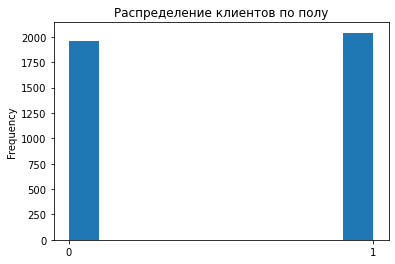

In [357]:
# Распределение клиентов по возрасту

data['Gender'].plot(kind = "hist", xlabel = 'Gender', title = 'Распределение клиентов по полу')
plt.xticks([0, 1])

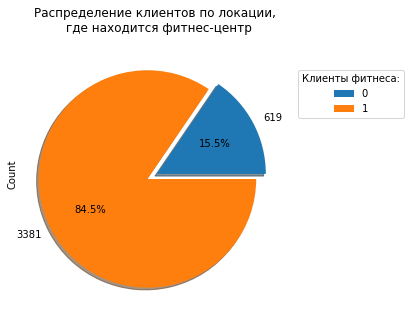

In [359]:
# Распеределение клиентов по локации

df = data[['Near_Location', 'Gender']].groupby(['Near_Location']).count()
df = df.rename(columns = {"Gender":"Count"})
df.reset_index()
explode = (0, 0.1)
df.plot.pie(subplots=True, explode = explode, figsize=(5,5), labels=df['Count'], autopct = '%1.1f%%', shadow = True)
plt.legend(['0','1'], title = "Клиенты фитнеса:", bbox_to_anchor=(1, 0.9))
plt.title("Распределение клиентов по локации, \n где находится фитнес-центр")
plt.show()

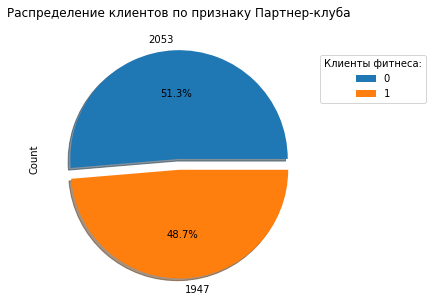

In [361]:
# Распределение клиентов по признаку "Партнер-клуба"

df = data[['Partner', 'Gender']].groupby(['Partner']).count()
df = df.rename(columns = {"Gender":"Count"})
df.reset_index()
explode = (0, 0.1)
df.plot.pie(subplots=True, explode = explode, figsize=(5,5), labels=df['Count'], autopct = '%1.1f%%', shadow = True)
plt.legend(['0','1'], title = "Клиенты фитнеса:", bbox_to_anchor=(1, 0.9))
plt.title("Распределение клиентов по признаку Партнер-клуба")
plt.show()

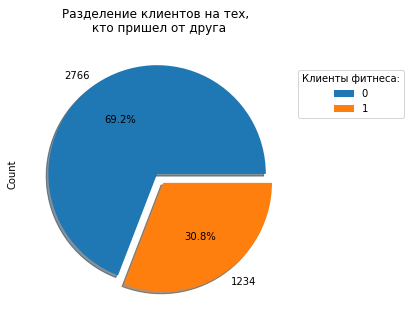

In [362]:
# Распределение клиентов по акции ЭПромокод от друга" 

df = data[['Promo_friends', 'Gender']].groupby(['Promo_friends']).count()
df = df.rename(columns = {"Gender":"Count"})
df.reset_index()
explode = (0, 0.1)
df.plot.pie(subplots=True, explode = explode, figsize=(5,5), labels=df['Count'], autopct = '%1.1f%%', shadow = True)
plt.legend(['0','1'], title = "Клиенты фитнеса:", bbox_to_anchor=(1, 0.9))
plt.title("Разделение клиентов на тех, \n кто пришел от друга")
plt.show()

([<matplotlib.axis.XTick at 0x7fa2c99c2580>,
 [Text(0, 0, ''), Text(0, 0, '')])

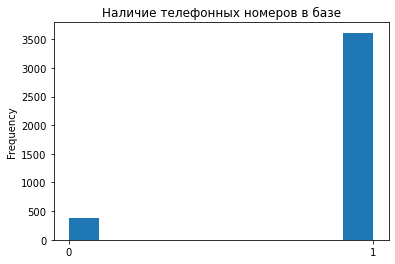

In [363]:
# Распределение клиентов по наличию телефонного номера в базе

data['Phone'].plot(kind = "hist", xlabel = 'phone',  title = 'Наличие телефонных номеров в базе')
plt.xticks([0, 1])

/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Contract_period', ylabel='Density'>

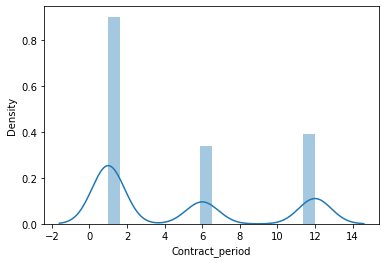

In [197]:
# Распределение длительности текущего абонемента
sns.distplot(data.Contract_period)

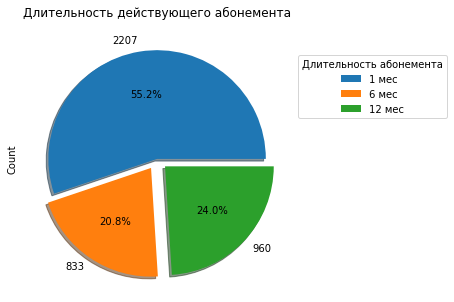

In [365]:
df = data[['Contract_period', 'Gender']].groupby(['Contract_period']).count()
df = df.rename(columns = {"Gender":"Count"})
df.reset_index()
explode = (0, 0.1, 0.1)
df.plot.pie(subplots=True, explode = explode, figsize=(5,5), labels=df['Count'], autopct = '%1.1f%%', shadow = True)
plt.legend(['1 мес','6 мес', '12 мес'], title = "Длительность абонемента", bbox_to_anchor=(1, 0.9))
plt.title("Длительность действующего абонемента")
plt.show()

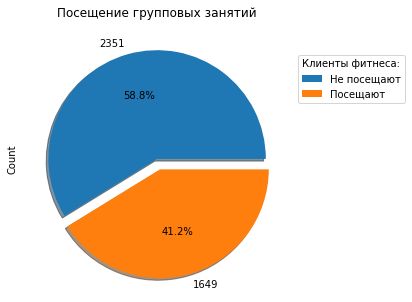

In [366]:
# Распределение клиентов по посещению групповых занятий 

df = data[['Group_visits', 'Gender']].groupby(['Group_visits']).count()
df = df.rename(columns = {"Gender":"Count"})
df.reset_index()
explode = (0, 0.1)
df.plot.pie(subplots=True, explode = explode, figsize=(5,5), labels=df['Count'], autopct = '%1.1f%%', shadow = True)
plt.legend(['Не посещают','Посещают'], title = "Клиенты фитнеса:", bbox_to_anchor=(1, 0.9))
plt.title("Посещение групповых занятий")
plt.show()

/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

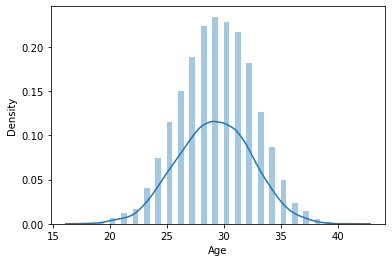

In [217]:
# Распределение клиентов по возрасту

sns.distplot(data.Age)

Распределение клиентов по возрасту похоже на нормальное.
Значит среднее значение, медиана и мода будут приблизительно одинаковы.

In [368]:
#Распределение клиентов по возрасту похоже на нормальное.
#Значит среднее значение, медиана и мода будут приблизительно одинаковы.

print("Медиана:", data['Age'].median(), "\nСреднее арифметическое:", data['Age'].mean(), "\nМода:", data['Age'].mode())

Медиана: 29.0 
Среднее арифметическое: 29.18425 
Мода: 0    29
dtype: int64


/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Среднее арифметическое: 146.94372780925008


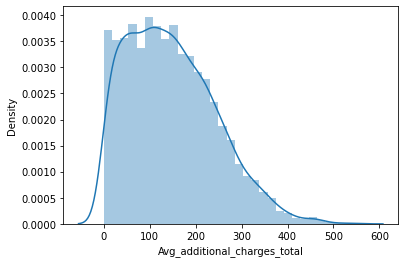

In [376]:
# Распределение суммарной выручки от других услуг фитнеса

sns.distplot(data.Avg_additional_charges_total)
print("Среднее арифметическое:", data['Avg_additional_charges_total'].mean())

Среднее арифметическое: 5.0115


/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


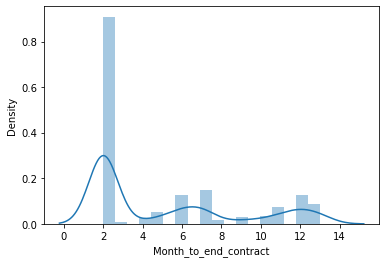

In [377]:
# Распределение срока до окончания текущего действующего абонемента 

sns.distplot(data.Month_to_end_contract)
print("Среднее арифметическое:", data['Month_to_end_contract'].mean())

/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Среднее арифметическое: 1.879019712534941


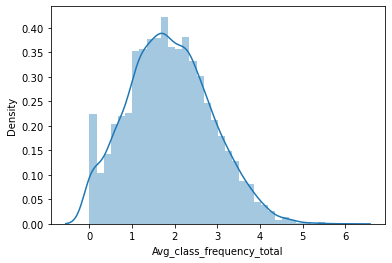

In [378]:
# Распределение средней частоты посещений в неделю за все время с начала действия абонемента

sns.distplot(data.Avg_class_frequency_total)
print("Среднее арифметическое:", data['Avg_class_frequency_total'].mean())

/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Среднее арифметическое: 1.7670518220405091


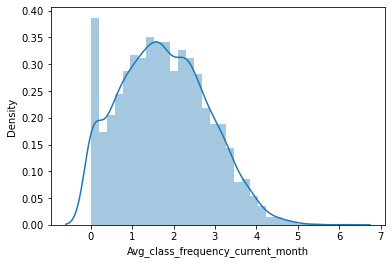

In [381]:
# Распределение средней частоты посещений в неделю за предыдущий месяц

sns.distplot(data.Avg_class_frequency_current_month)
print("Среднее арифметическое:", data['Avg_class_frequency_current_month'].mean())

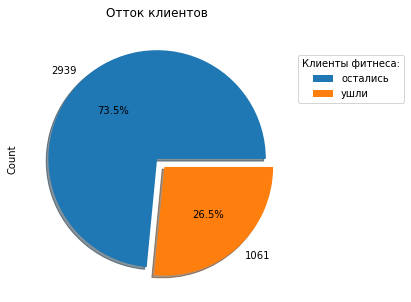

In [369]:
# Отток клиентов

df = data[['Churn', 'Gender']].groupby(['Churn']).count()
df = df.rename(columns = {"Gender":"Count"})
df.reset_index()
explode = (0, 0.1)
df.plot.pie(subplots=True, explode = explode, figsize=(5,5), labels=df['Count'], autopct = '%1.1f%%', shadow = True)
plt.legend(['остались','ушли'], title = "Клиенты фитнеса:", bbox_to_anchor=(1, 0.9))
plt.title("Отток клиентов")
plt.show()

/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Lifetime', ylabel='Density'>

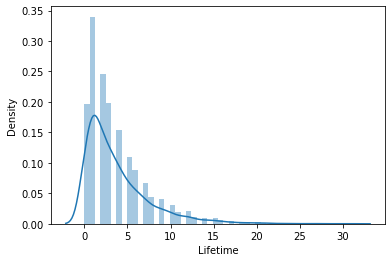

In [370]:
# Распределение по сроку действия абонемента

sns.distplot(data.Lifetime)

In [380]:
# Среднее

print("Среднее арифметическое:", data['Lifetime'].mean())

Среднее арифметическое: 3.72475


<a id = 'task5'> Выводы: 
- Мужчин и женщин приблизительно поровну 50 на 50; 
- 85% клиентов живут или работают рядом с фитнесом;
- Чуть меньше половины (49%) клиентов являются сотрудниками компаний-партнеров фитнес-клуба;
- 31% клиентов первоначально пришел по акции "Приведи друга";
- У 90% клиентов известен номер телефона;
- Длительность действующего абонемента у 55% клиентов составляет 1 месяц, у 21% - 6 месяцев и у 24% - 12 месяцев;
- 41% клиентов посещают групповые занятия;
- Средний возраст клиентов 29 лет;
- Средний срок действия абонемента составляет 3,7 месяцев;
- Среднее расходы на клиента за дополнительные услуги - 147; 
- Средний срок до окончания текущего действующего абонемента - 5 месяцев;
- Средняя частота посещений в неделю за все время с начала действия абонемента - 1,87;
- Средняя частота посещений в неделю за предыдущий месяц - 1,77;
- Отток клиентов составил 27%. 

<a id = 'task6'>Корреляционная связь 

Строю scatter plot matrix для того, чтобы с помощью этой визуализации на глаз оценить
корреляции между различными признаками

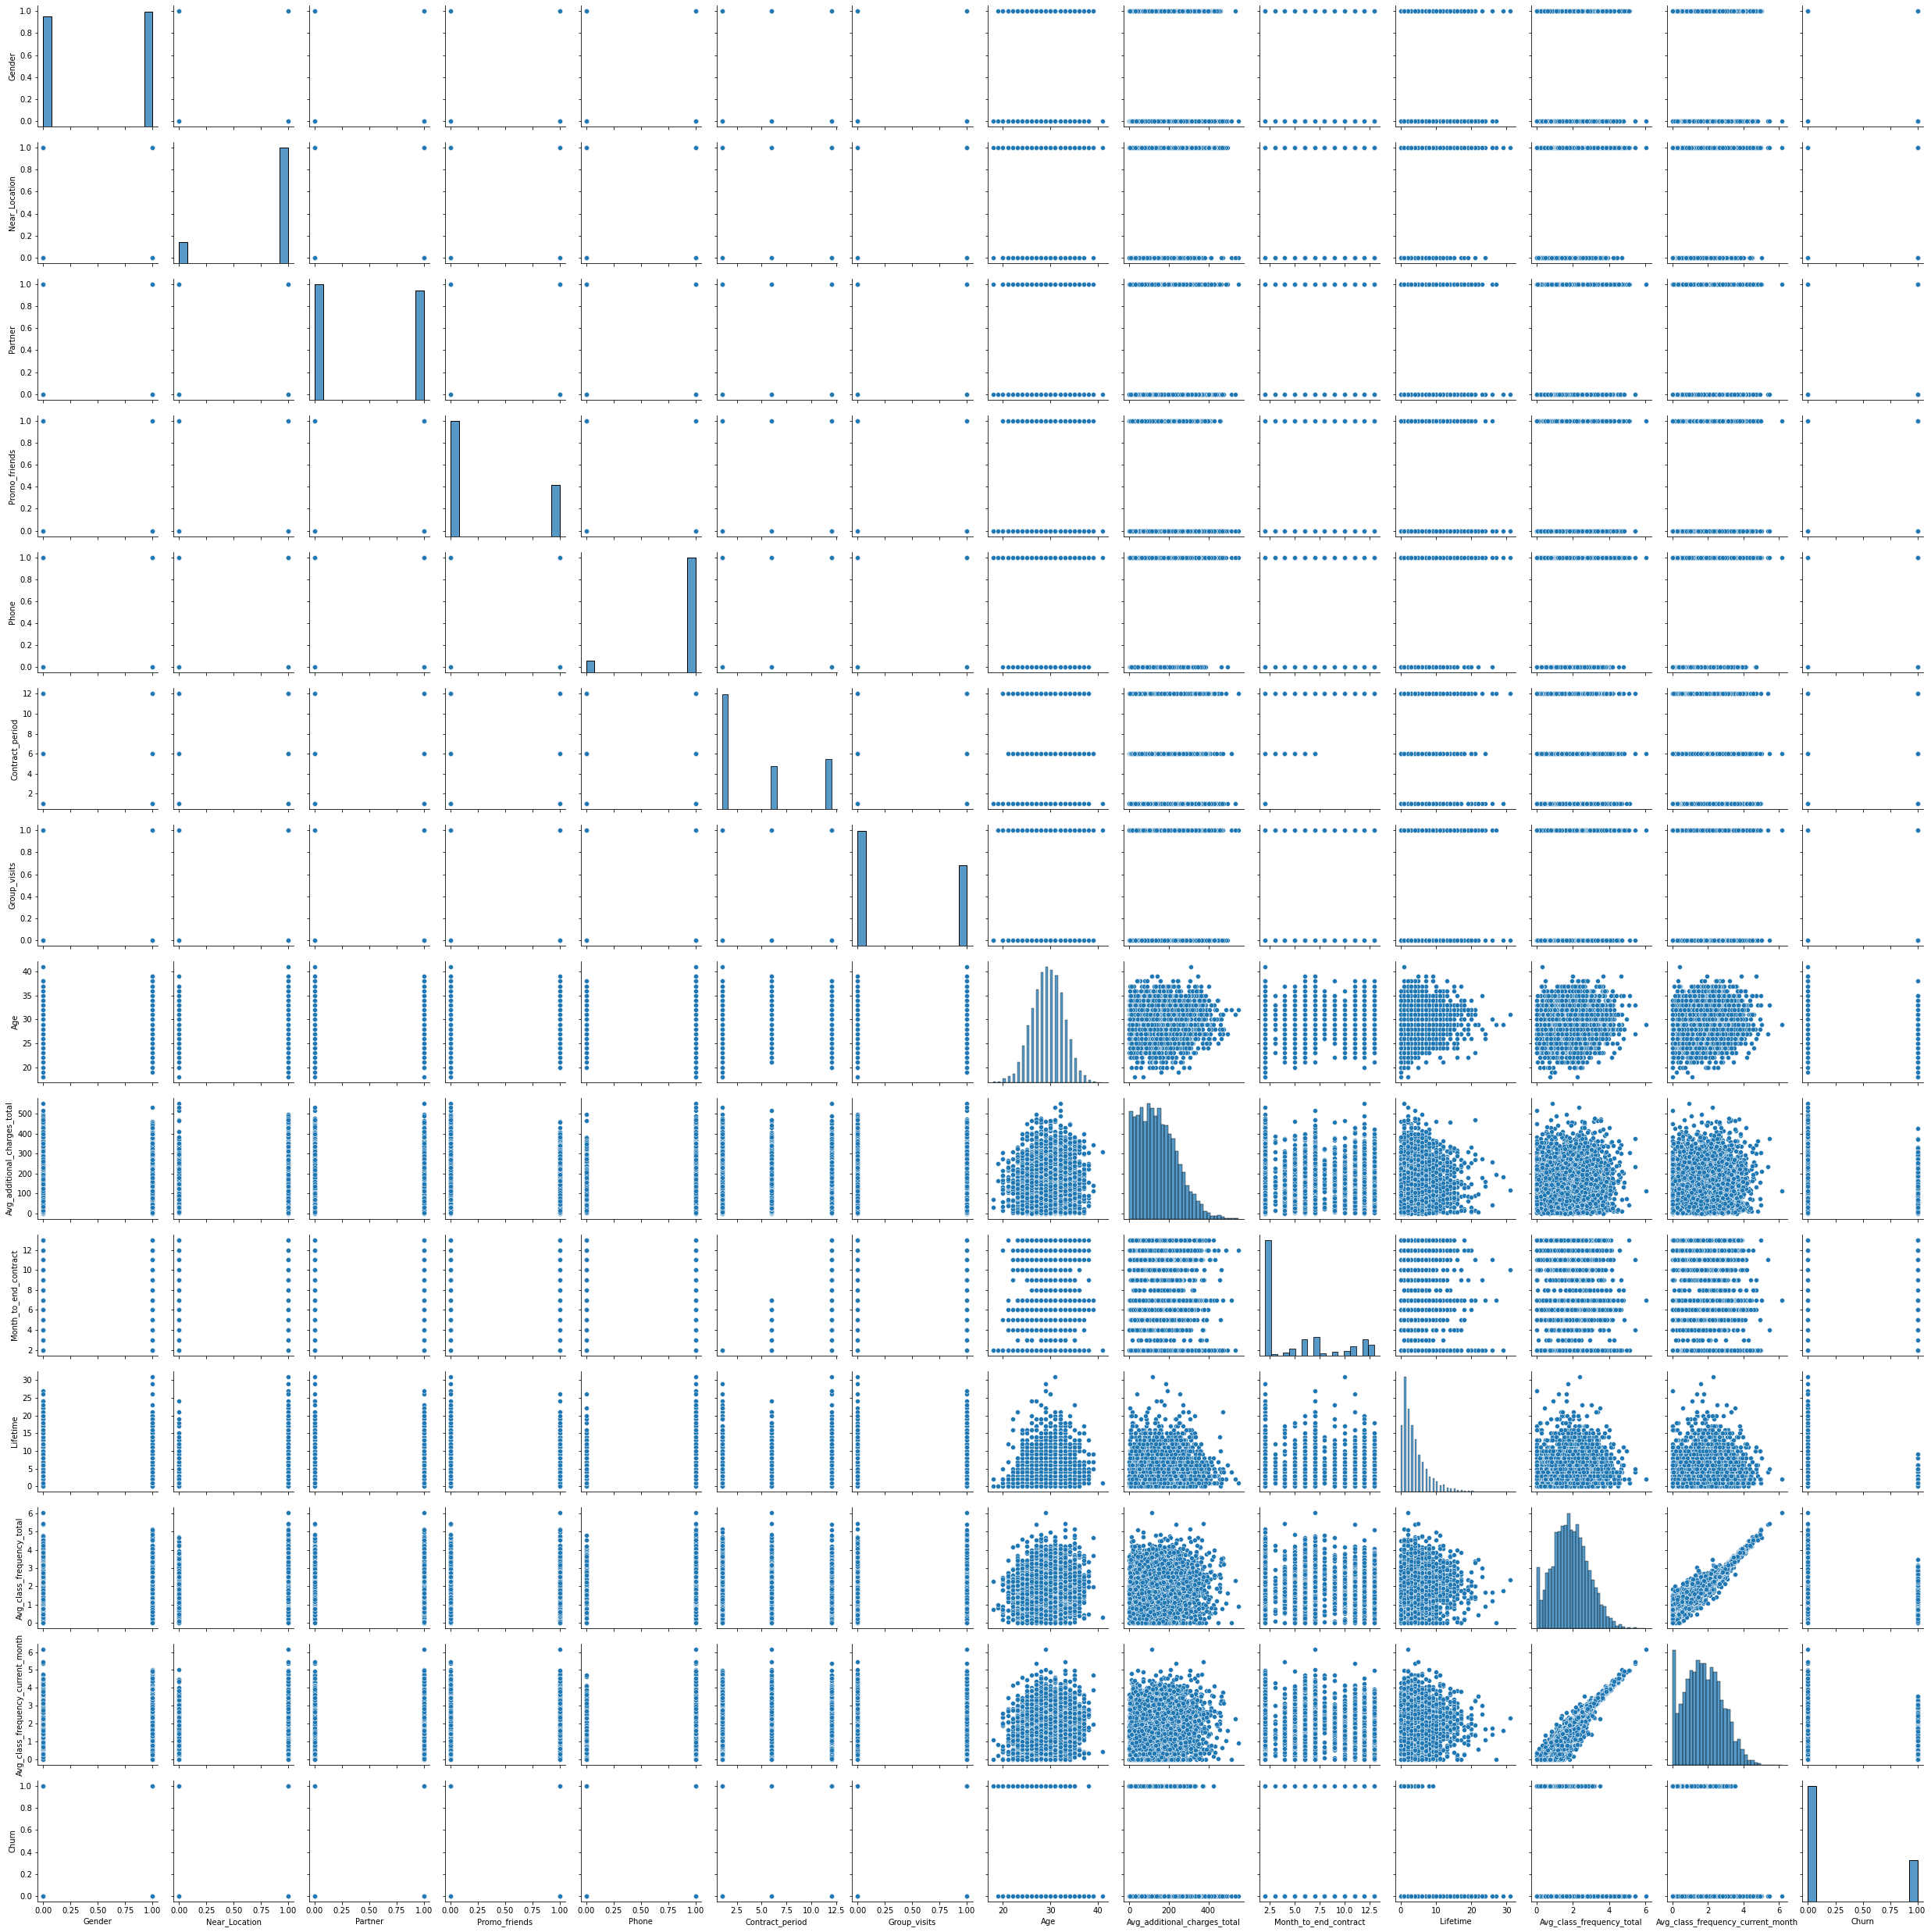

In [382]:
sns.pairplot(data)

Далее визуально выбираю и отдельно рассматриваю графики с возможной корреляцией

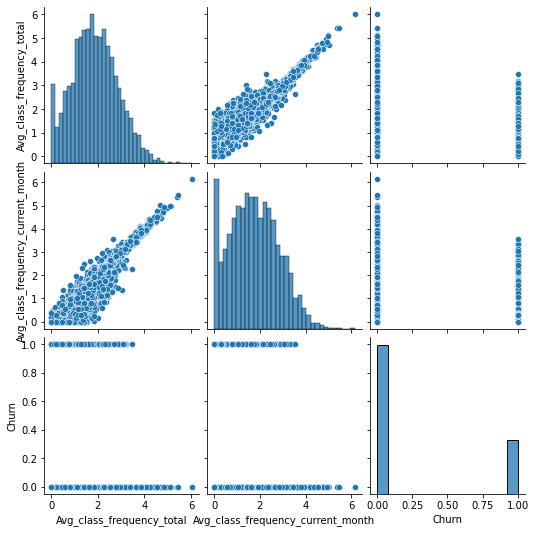

In [384]:
sns.pairplot(data[['Avg_class_frequency_total', 'Avg_class_frequency_current_month', 'Churn']])

Прослеживается взаимосвзяь между Avg_class_frequency_total и Avg_class_frequency_current_month, построю отдельно. 

<function matplotlib.pyplot.show(close=None, block=None)>

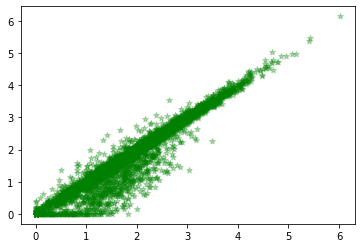

In [398]:
plt.scatter(data['Avg_class_frequency_total'], data['Avg_class_frequency_current_month'],
            color = 'green', alpha = 0.3, marker = '*' )
plt.show

Корреляция средней частоты посещений в неделю за все время с начала действия абонемента (Avg_class_frequency_total) и средней частоты  посещений в неделю за предыдущий месяц (Avg_class_frequency_current_month) неинформативна, поскольку очевидна и не дает данных для гипотез. 

Далее можно построить матрицу корреляций

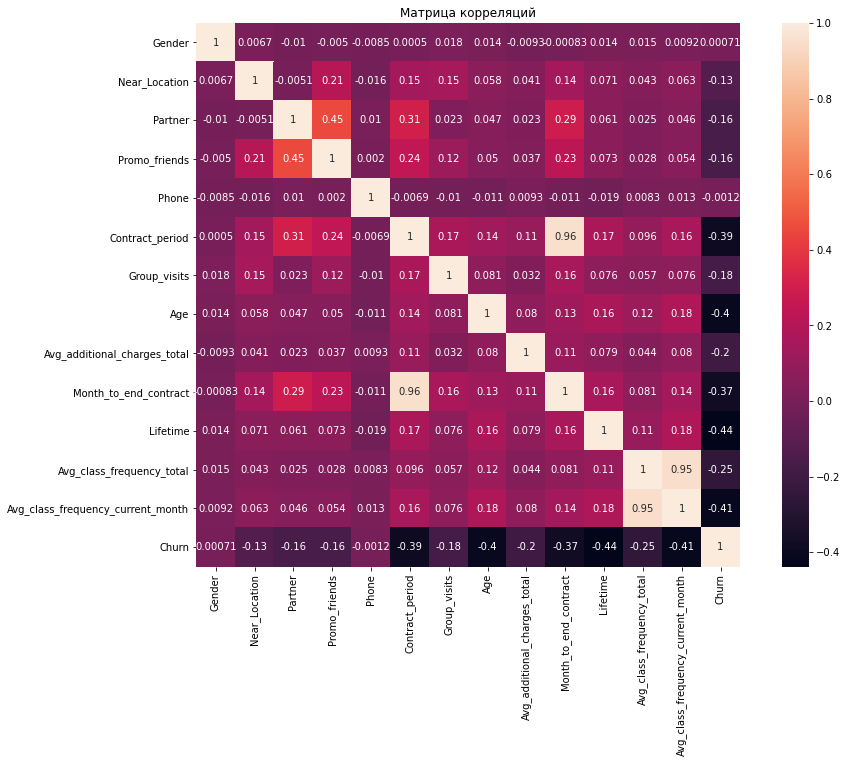

In [383]:
plt.figure(figsize=(15,10))
sns.heatmap(data = data.corr(), annot=True, square=True)
plt.title('Матрица корреляций')
plt.show()


Визуальный анализ тепловой карты не показал очевидной зависимости факта оттока от признаков. 
Между признаками прослеживается слабая линейная связь. 
Корреляционная зависимость прослеживается у следующих признаков: 
- Month_to_end_contract и Contract_period (сильная зависисмоть - 0,96);
- Promo_friends и Partner (слабая зависимость - 0,45). 

<a id = 'task7'>Сравнение групп клиентов: отток и оставшиеся. 

Визуально сравниваем показатели между двумя группами клиентов: в оттоке и оставшиеся. 

In [384]:
def feat_hist(x, group_col, key_cols):
    x_new = x.copy()
    x_new[key_cols] = data[key_cols]
    for c in key_cols:
        for cl in x[group_col].unique():
            g = sns.distplot(x_new[x_new[group_col]==cl][c], 
                         label='{} = {}'.format(group_col, str(cl)),  bins = 10)     
       
        g.figure.set_figwidth(10)
        g.figure.set_figheight(8) 
        plt.title(c)
        plt.legend()
        plt.show()

/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


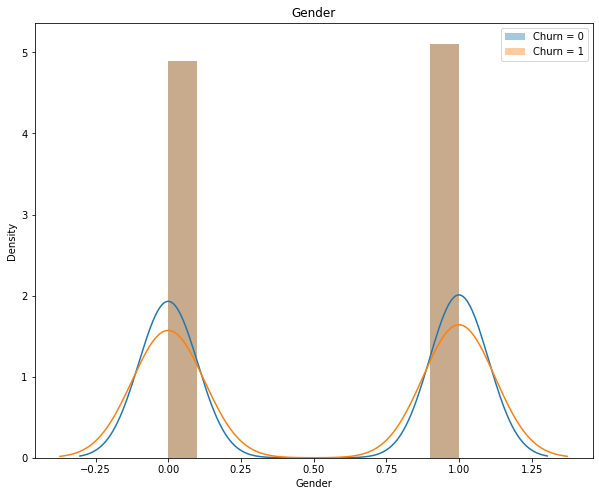

/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


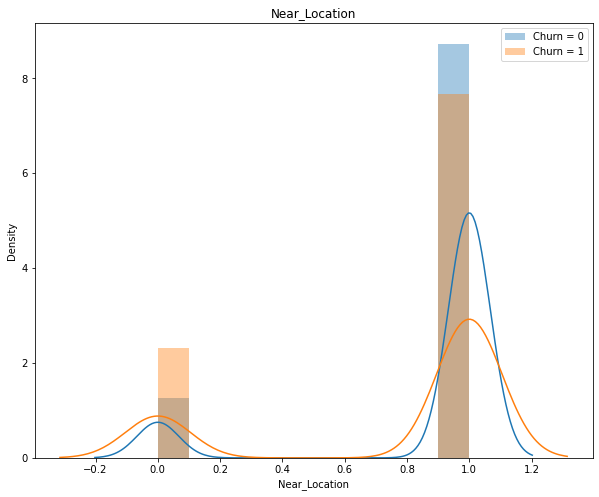

/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


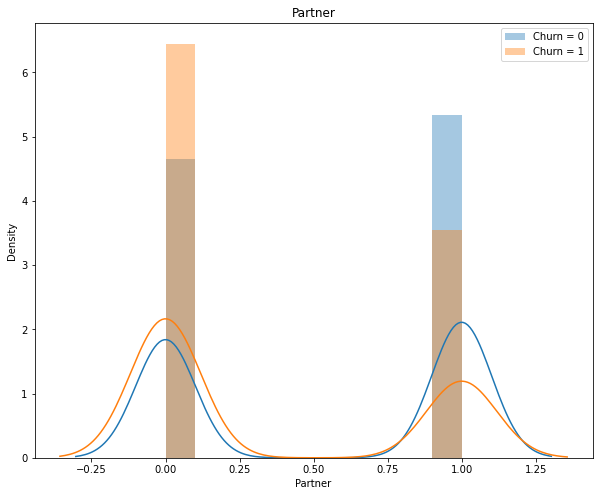

/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


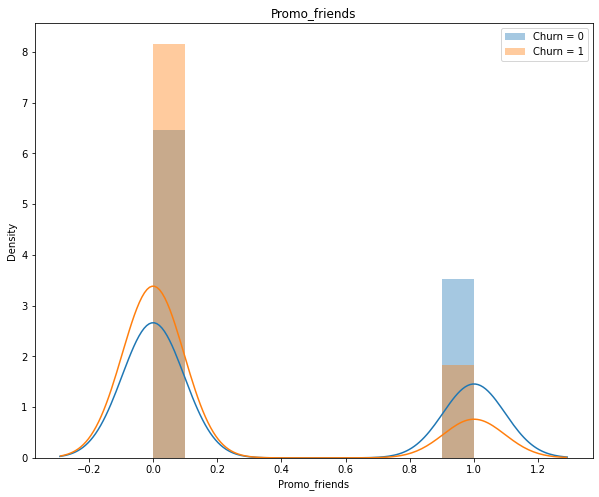

/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


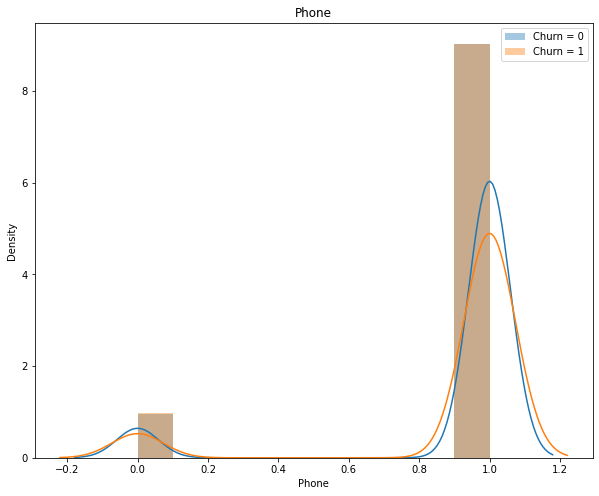

/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


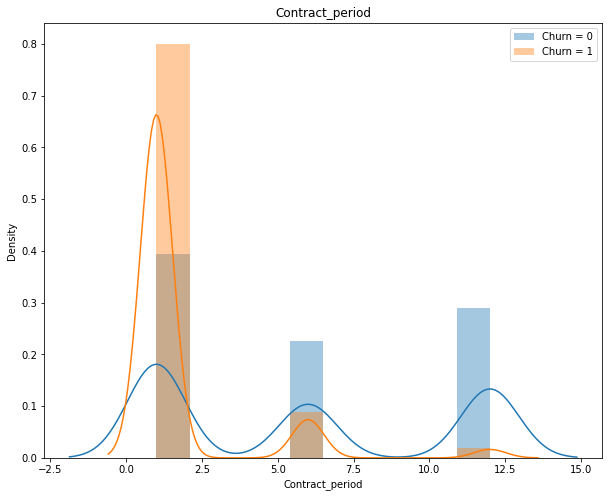

/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


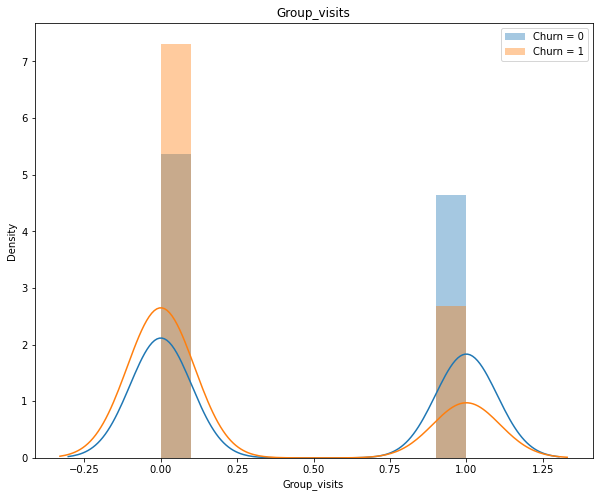

/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


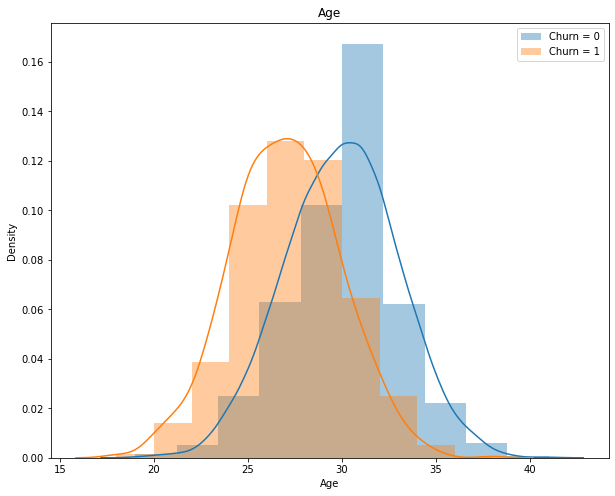

/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


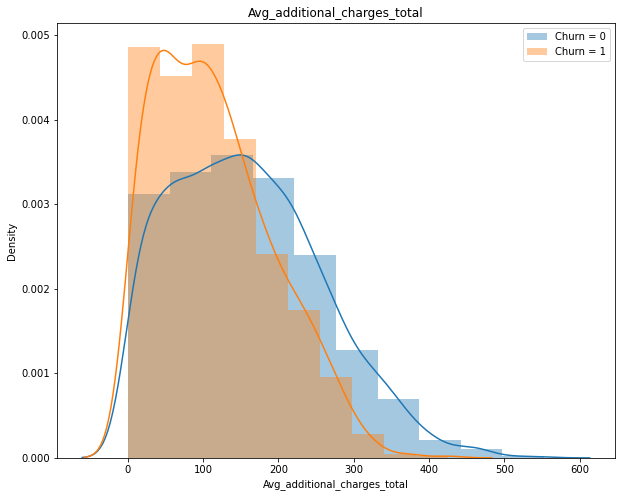

/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


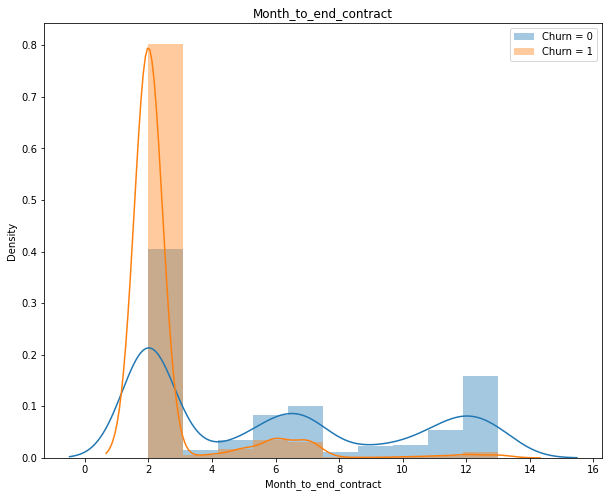

/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


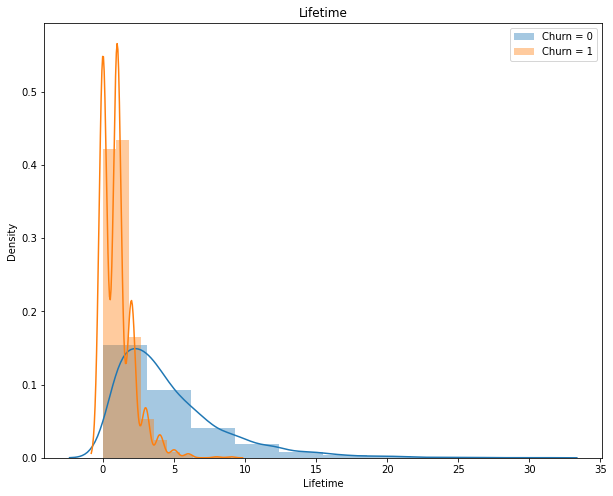

/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


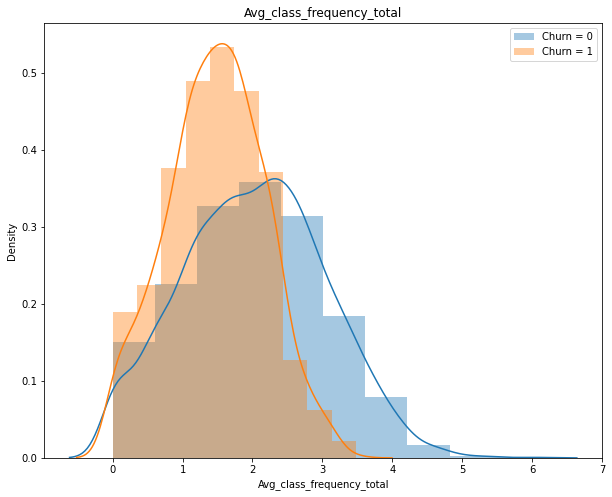

/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


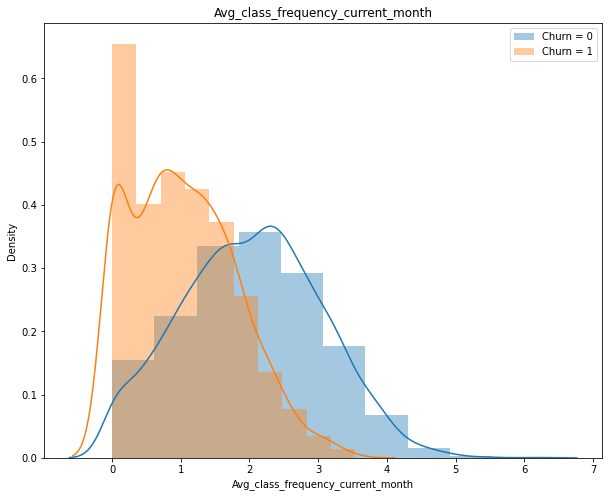

/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py

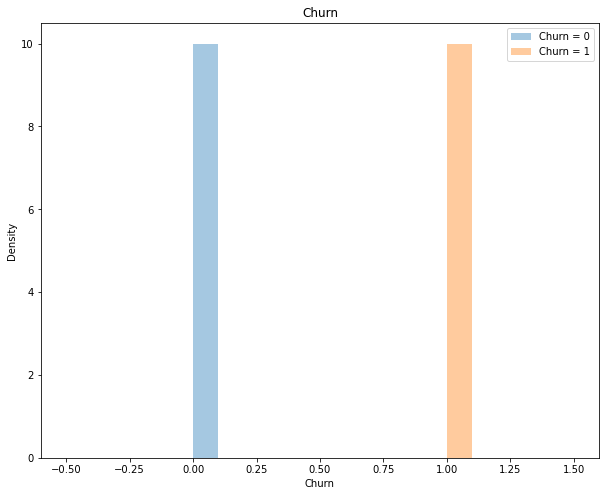

In [385]:
feat_hist(data, 'Churn', data.columns)

<a id = 'task8'>Выводы:
- Распределение клиентов по полу среди оставшихся и в оттоке не отличается; 
- В отток попадает больше клиентов, живущих или работающих в другом районе; 
- Клиенты компаний-партнеров фитнес-центра реже попадают в отток; 
- Клиенты, пришедшие по промокодам от знакомых, в два раза реже попадают в отток;
- Наличие контактного телефона в базе не влияет на отток;
- Большая часть клиентов в оттоке с длительностью абонемента 1-2 месяца. Следовательно, срок окончания абонемента будет выше у клиентов, которые остались;     
- Клиенты, попавшие в отток, реже посещали групповые занятия;
- Средний возраст клиентов, попавших в отток, 26 лет. Средний возраст оставшихся клиентов - 31 год; 
- Средняя суммарная выручка от дополнительных услуг выше от клиентов, которые остались; 
- Средняя частота посещений в неделю больше у оставшихся клиентов. 

<a id = 'task9'>Модели прогноза оттока в следующем месяце.

<a id = 'task10'> Модель логистической  регрессии 

In [388]:
data.columns

Index(['Gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',
       'Contract_period', 'Group_visits', 'Age',
       'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime',
       'Avg_class_frequency_total', 'Avg_class_frequency_current_month',
       'Churn'],
      dtype='object')

In [389]:
# Разделяем датасет на X и y

X = data [['Gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',
       'Contract_period', 'Group_visits', 'Age',
       'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime',
       'Avg_class_frequency_total', 'Avg_class_frequency_current_month']]

y = data ['Churn']

In [390]:
# Делим данные на 70% тренировочных и 30% тестовых

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [391]:
# Создаем модель логистической регрессии 

model = LogisticRegression()
model.fit(X_train, y_train)  # метод обучается на данных  для тренировки

/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [392]:
# Предсказываем y_pred (отток)

y_pred = model.predict(X_test)      
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [393]:
# сравниваем прогнозы с фактом

res_data = X_test.copy()
res_data['y_pred'] = y_pred
res_data['y_test'] = y_test
res_data.head(5)

Gender  Near_Location  Partner  Promo_friends  Phone  Contract_period  \
555        1              1        0              0      1                6   
3491       0              0        0              0      1                6   
527        1              1        0              0      1                1   
3925       1              0        0              0      1                1   
2989       1              1        0              0      0                1   

      Group_visits  Age  Avg_additional_charges_total  Month_to_end_contract  \
555              1   37                    205.631751                      5   
3491             0   27                    137.370917                      7   
527              1   25                     41.607768                      2   
3925             0   31                      9.593524                      2   
2989             0   30                    275.271537                      2   

      Lifetime  Avg_class_frequency_total  Avg_class_frequency_current_month  \
555          2                   1.400690                           1.614663   
3491        24                   0.918920                           1.093414   
527          1                   2.893104                           2.813602   
3925        14                   2.131718                           2.147013   
2989         4                   1.653789                           1.738444   

      y_pred  y_test  
555        0       0  
3491       0       0  
527        1       0  
3925       0       0  
2989       0       0

Для оценки производительности модели строим матрицу ошибок:

In [394]:
confusion_matrix(y_test, y_pred)

array([[869,  28],
       [ 61, 242]])

Матрицу ошибок можно представить в виде тепловой карты:

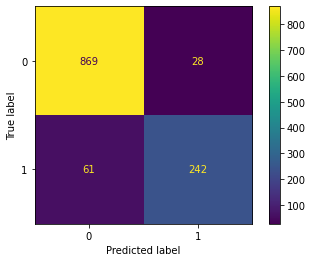

In [855]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

Полученные данные говорят о том, что у нас 869+242  - правильных прогнозов (из них 242 попадут в отток, а 869 останутся) и 61+28  - ошибочных 

На основе матрицы ошибок можно рассчитать следующие метрики: 
- Precision показывает, насколько можно "доверять" модели, если она показала класс 1
- Recall показывает, как хорошо модель умеет находить класс 1;
- f1 - гармоническое среднее между точностью и полнотой.

In [395]:
print('Precision:', precision_score(y_test, y_pred), '\nRecall:', recall_score(y_test, y_pred), '\nF1 score:', f1_score(y_test, y_pred) )

Precision: 0.8962962962962963 
Recall: 0.7986798679867987 
F1 score: 0.8446771378708551


Максимальное значение F1 может быть =1, что говорит об идеальной модели. 
Для нашей модели F1 получилось около 0.8, что тоже очень неплохо. 

Для модели линейной регрессии попробуем перебрать параметры для поиска наилучшего результата. 

GridSearchCV – это очень мощный инструмент для автоматического подбирания параметров для моделей машинного обучения. GridSearchCV находит наилучшие параметры, путем обычного перебора: он создает модель для каждой возможной комбинации параметров.

In [448]:
# Создаю словарь с параметрами 

param_grid = {
    "penalty": ['l1', 'l2', 'elasticnet', 'none'],
    "C": [0.1, 0.5, 1.0, 2.0], 
}

In [449]:
gs_lr = GridSearchCV(model, param_grid, scoring = 'f1_weighted', cv = 3)

In [450]:
gs_lr.fit(X_train, y_train)

/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/ponchy/opt

/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    http

/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    http

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.5, 1.0, 2.0],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']},
             scoring='f1_weighted')

In [451]:
# Лучшие параметры

gs_lr.best_params_

{'C': 0.1, 'penalty': 'none'}

In [452]:
# Точность, полученная с наилучшими параметрами 

a = gs_lr.best_score_

<a id = 'task11'>Модель случайного леса 

In [400]:
model_f = RandomForestClassifier(random_state=42)

In [401]:
model_f.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [402]:
y_pred_f = model_f.predict(X_test)


In [403]:
# Cравниваем прогнозы с фактом

res_data = X_test.copy()

res_data['y_pred_f'] = y_pred_f
res_data['y_test'] = y_test
res_data.head(5)

Gender  Near_Location  Partner  Promo_friends  Phone  Contract_period  \
555        1              1        0              0      1                6   
3491       0              0        0              0      1                6   
527        1              1        0              0      1                1   
3925       1              0        0              0      1                1   
2989       1              1        0              0      0                1   

      Group_visits  Age  Avg_additional_charges_total  Month_to_end_contract  \
555              1   37                    205.631751                      5   
3491             0   27                    137.370917                      7   
527              1   25                     41.607768                      2   
3925             0   31                      9.593524                      2   
2989             0   30                    275.271537                      2   

      Lifetime  Avg_class_frequency_total  Avg_class_frequency_current_month  \
555          2                   1.400690                           1.614663   
3491        24                   0.918920                           1.093414   
527          1                   2.893104                           2.813602   
3925        14                   2.131718                           2.147013   
2989         4                   1.653789                           1.738444   

      y_pred_f  y_test  
555          0       0  
3491         0       0  
527          0       0  
3925         0       0  
2989         0       0

In [404]:
confusion_matrix(y_test, y_pred_f)

array([[856,  41],
       [ 63, 240]])

In [405]:
print('Precision:', precision_score(y_test, y_pred_f))
print('Recall:', recall_score(y_test, y_pred_f))
print('F1 score:', f1_score(y_test, y_pred_f))

Precision: 0.8540925266903915
Recall: 0.7920792079207921
F1 score: 0.821917808219178


Метрики получились чуть хуже, чем у модели лнейной регрессии 

Аналогично, с помощью GridSearchCV подбираем наилучшие параметры   

In [406]:
param_grid = {
    "n_estimators": [50, 100, 400],
    "min_samples_split": [2, 5, 10], 
    "max_depth": [1, 2, 5, 10], 
    "min_samples_leaf": [1, 2, 5, 10]
}

In [407]:
gs_f = GridSearchCV(model_f, param_grid, scoring = 'f1_weighted', cv = 3)

In [408]:
gs_f.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [1, 2, 5, 10],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 400]},
             scoring='f1_weighted')

In [887]:
# Наилучшие параметры для модели 

gs_f.best_params_

{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [453]:
# Точность, полученная с наилучшими параметрами 

b = gs_f.best_score_

<a id = 'task12'> Модель дерева решений

In [409]:
model_t = DecisionTreeClassifier(random_state = 42)

In [410]:
model_t.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [411]:
y_pred_t = model_t.predict(X_test)
y_pred_t

array([0, 0, 0, ..., 0, 0, 0])

In [412]:
# Cравниваем прогнозы с фактом

res_data = X_test.copy()

res_data['y_pred_t'] = y_pred_t
res_data['y_test'] = y_test
res_data.head(5)

Gender  Near_Location  Partner  Promo_friends  Phone  Contract_period  \
555        1              1        0              0      1                6   
3491       0              0        0              0      1                6   
527        1              1        0              0      1                1   
3925       1              0        0              0      1                1   
2989       1              1        0              0      0                1   

      Group_visits  Age  Avg_additional_charges_total  Month_to_end_contract  \
555              1   37                    205.631751                      5   
3491             0   27                    137.370917                      7   
527              1   25                     41.607768                      2   
3925             0   31                      9.593524                      2   
2989             0   30                    275.271537                      2   

      Lifetime  Avg_class_frequency_total  Avg_class_frequency_current_month  \
555          2                   1.400690                           1.614663   
3491        24                   0.918920                           1.093414   
527          1                   2.893104                           2.813602   
3925        14                   2.131718                           2.147013   
2989         4                   1.653789                           1.738444   

      y_pred_t  y_test  
555          0       0  
3491         0       0  
527          0       0  
3925         0       0  
2989         0       0

In [413]:
confusion_matrix(y_test, y_pred_t)

array([[828,  69],
       [ 67, 236]])

In [414]:
print('Precision:', precision_score(y_test, y_pred_t))
print('Recall:', recall_score(y_test, y_pred_t))
print('F1 score:', f1_score(y_test, y_pred_t))

Precision: 0.7737704918032787
Recall: 0.7788778877887789
F1 score: 0.7763157894736842


Метрики получились хуже, чем у модели линейной регрессии и модели случайного леса.

Аналогично, с помощью GridSearchCV подбираем наилучшие параметры.

In [416]:
# словарь параметров

param_grid = {   
    "min_samples_split": [2, 5, 10], 
    "max_depth": [1, 2, 5, 10], 
    "min_samples_leaf": [1, 2, 5, 10]
}

In [417]:
gs_t = GridSearchCV(model_t, param_grid, scoring = 'f1_weighted', cv = 3)

In [418]:
gs_t.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [1, 2, 5, 10],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10]},
             scoring='f1_weighted')

In [419]:
# Наилучшие параметры для модели 

gs_t.best_params_

{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}

In [454]:
# Точность, полученная с наилучшими параметрами 

c = gs_t.best_score_

<a id = 'task13'> Модель EXtreme Gradient Boosting

In [428]:
model_exgb = XGBClassifier()

In [429]:
model_exgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [430]:
y_pred_exgb = model_exgb.predict(X_test)
y_pred_exgb

array([0, 0, 1, ..., 0, 0, 0])

In [431]:
res_data = X_test.copy()

res_data['y_pred_exgb'] = y_pred_exgb
res_data['y_test'] = y_test
res_data.head(5)

Gender  Near_Location  Partner  Promo_friends  Phone  Contract_period  \
555        1              1        0              0      1                6   
3491       0              0        0              0      1                6   
527        1              1        0              0      1                1   
3925       1              0        0              0      1                1   
2989       1              1        0              0      0                1   

      Group_visits  Age  Avg_additional_charges_total  Month_to_end_contract  \
555              1   37                    205.631751                      5   
3491             0   27                    137.370917                      7   
527              1   25                     41.607768                      2   
3925             0   31                      9.593524                      2   
2989             0   30                    275.271537                      2   

      Lifetime  Avg_class_frequency_total  Avg_class_frequency_current_month  \
555          2                   1.400690                           1.614663   
3491        24                   0.918920                           1.093414   
527          1                   2.893104                           2.813602   
3925        14                   2.131718                           2.147013   
2989         4                   1.653789                           1.738444   

      y_pred_exgb  y_test  
555             0       0  
3491            0       0  
527             1       0  
3925            0       0  
2989            0       0

In [432]:
confusion_matrix(y_test, y_pred_exgb)

array([[861,  36],
       [ 48, 255]])

In [433]:
print('Precision:', precision_score(y_test, y_pred_exgb))
print('Recall:', recall_score(y_test, y_pred_exgb))
print('F1 score:', f1_score(y_test, y_pred_exgb))

Precision: 0.8762886597938144
Recall: 0.8415841584158416
F1 score: 0.8585858585858587


Метрики получились на уровне линейной регрессии.  

Ищем наилучшие параметры с помощью GridSearchCV.

In [434]:
# Словарь параметров

param_grid = {
    "n_estimators": [50, 100, 400],
    "learning_rate": [0.5, 1, 2], 
    "max_depth": [1, 5, 10], 
    "colsample_bytree": [0.8, 1, 2]
}

In [435]:
gs_exgb = GridSearchCV(model_exgb, param_grid, scoring = 'f1_weighted', cv = 3)

In [436]:
gs_exgb.fit(X_train, y_train)

/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 818, in fit
    self._Booster = train(xgb_options, train_dmatrix,
  File "/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 208, in train
    return _train_internal(params, dtrain,
  File "/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 75, in _train_internal
    bst.update(dtrain, i, obj)
  File "/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 1367, in update


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=0,
                                     num_parallel_tree=1, random_state=0,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                     tree_method='exact', validate_parameters=1,
         

In [439]:
# Наилучшие параметры для модели 

gs_exgb.best_params_

{'colsample_bytree': 1,
 'learning_rate': 0.5,
 'max_depth': 5,
 'n_estimators': 100}

In [443]:
d = gs_exgb.best_score_

In [455]:
print ("Логистическая регрессия:", a, "\nСлучайный лес:", b , "\nДерево решений:", c, "\nXGBoost:", d)

Логистическая регрессия: 0.9234554551328357 
Случайный лес: 0.9169962308917806 
Дерево решений: 0.9006623315828595 
XGBoost: 0.9359975182041045


<a id = 'task14'>Выводы: 

Модель XGBoos показала себя лучше. Больше правильных прогнозов. 


<a id = 'task15'>Модели кластеризации клиентов. 

In [469]:
X = data [['Gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',
       'Contract_period', 'Group_visits', 'Age',
       'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime',
       'Avg_class_frequency_total', 'Avg_class_frequency_current_month']].values

In [470]:
# приведем данные к единому масштабу

scaler = StandardScaler()

In [471]:
X_scaled_tr = scaler.fit_transform(X)

In [472]:
X_scaled_tr

array([[ 0.97970588,  0.42788074,  1.02686062, ..., -0.19332863,
        -1.91191971, -1.67847198],
       [-1.0207145 ,  0.42788074, -0.973842  , ...,  0.87368001,
         0.04517569,  0.1360137 ],
       [-1.0207145 ,  0.42788074,  1.02686062, ..., -0.46008079,
        -0.02049263, -0.02901851],
       ...,
       [ 0.97970588,  0.42788074,  1.02686062, ..., -0.46008079,
         0.93313947,  1.01103141],
       [-1.0207145 ,  0.42788074,  1.02686062, ..., -0.19332863,
        -0.25604937, -0.16225246],
       [ 0.97970588, -2.33709981,  1.02686062, ..., -0.72683295,
        -0.79947418, -0.69509885]])

<a id = 'task16'> Иерархическая кластеризация.

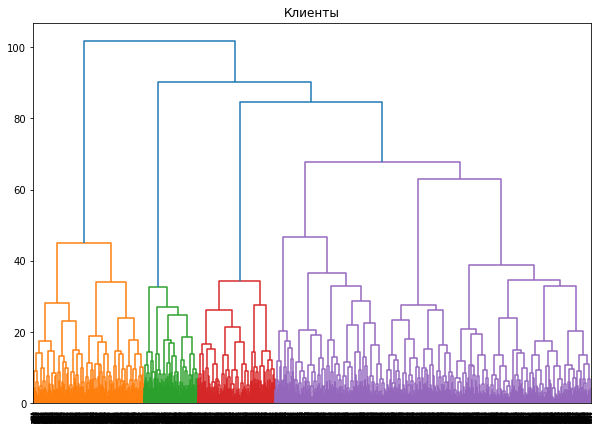

In [463]:
# Строим дендрограмму 

plt.figure(figsize=(10, 7))
plt.title("Клиенты")
dend = shc.dendrogram(shc.linkage(X_scaled_tr, method='ward'))

Оптимально разделить клиентов на 4 кластера

In [464]:
# С помощью алгоритма агломеративной кластеризации разделим данные на 4 кластера 

from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
cluster.fit_predict(X_scaled_tr)

array([2, 1, 0, ..., 1, 0, 2])

<a id = 'task17'>K-Means Clustering

In [473]:
# Используем метод локтя для нахождения нужного количества кластеров

wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(X_scaled_tr)
    wcss.append(kmeans.inertia_)


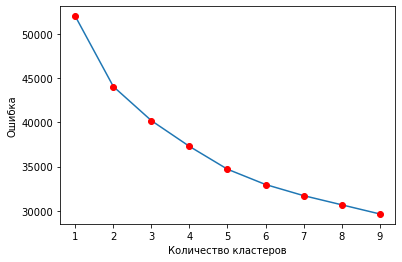

In [474]:
plt.plot(range(1,10), wcss)
plt.plot(range(1,10), wcss ,'ro')
plt.xlabel('Количество кластеров')
plt.ylabel('Ошибка')
plt.show()

Разбиваем также на 4 кластера методом k-средних

In [48]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_scaled_tr)

In [49]:
y_kmeans

array([0, 3, 1, ..., 3, 3, 0], dtype=int32)

In [153]:
# Добавляю столбец Cluster в датафрейм с указанием кластера

data_clust = data.copy()
data_clust['Cluster'] = y_kmeans
data_clust.head(5)

Gender  Near_Location  Partner  Promo_friends  Phone  Contract_period  \
0       1              1        1              1      0                6   
1       0              1        0              0      1               12   
2       0              1        1              0      1                1   
3       0              1        1              1      1               12   
4       1              1        1              1      1                1   
5       1              1        0              0      1                1   
6       1              1        1              1      0                6   
7       0              1        0              0      1                1   
8       1              1        1              1      1                1   
9       0              1        0              0      1                1   

   Group_visits  Age  Avg_additional_charges_total  Month_to_end_contract  \
0             1   29                     14.227470                      5   
1             1   31                    113.202938                     13   
2             0   28                    129.448479                      2   
3             1   33                     62.669863                     12   
4             0   26                    198.362265                      2   
5             1   34                    450.743960                      2   
6             1   32                     94.266389                      6   
7             0   30                    217.786641                      2   
8             1   23                     45.409909                      2   
9             0   31                     65.310836                      2   

   Lifetime  Avg_class_frequency_total  Avg_class_frequency_current_month  \
0         3                   0.020398                           0.000000   
1         7                   1.922936                           1.910244   
2         2                   1.859098                           1.736502   
3         2                   3.205633                           3.357215   
4         3                   1.113884                           1.120078   
5         3                   2.623477                           2.637007   
6         2                   1.138941                           1.277242   
7         0                   1.213502                           1.049387   
8         1                   1.106239                           1.059333   
9        11                   1.810852                           1.951368   

   Churn  Cluster  
0      0        0  
1      0        3  
2      0        1  
3      0        3  
4      0        1  
5      0        2  
6      0        0  
7      1        1  
8      0        1  
9      0        2

In [178]:
# Исследуем 0 кластер
data_clust_0 = data_clust[data_clust['Cluster'] == 0]

In [179]:
data_clust_0.describe()

Gender  Near_Location     Partner  Promo_friends  Phone  \
count  386.000000     386.000000  386.000000     386.000000  386.0   
mean     0.523316       0.862694    0.471503       0.305699    0.0   
std      0.500104       0.344616    0.499835       0.461301    0.0   
min      0.000000       0.000000    0.000000       0.000000    0.0   
25%      0.000000       1.000000    0.000000       0.000000    0.0   
50%      1.000000       1.000000    0.000000       0.000000    0.0   
75%      1.000000       1.000000    1.000000       1.000000    0.0   
max      1.000000       1.000000    1.000000       1.000000    0.0   

       Contract_period  Group_visits         Age  \
count       386.000000    386.000000  386.000000   
mean          4.777202      0.427461   29.297927   
std           4.535814      0.495352    3.160938   
min           1.000000      0.000000   20.000000   
25%           1.000000      0.000000   27.000000   
50%           1.000000      0.000000   29.000000   
75%           6.000000      1.000000   31.000000   
max          12.000000      1.000000   38.000000   

       Avg_additional_charges_total  Month_to_end_contract    Lifetime  \
count                    386.000000             386.000000  386.000000   
mean                     144.208179               5.145078    3.940415   
std                       94.124743               3.981736    4.052778   
min                        1.767654               2.000000    0.000000   
25%                       71.090935               2.000000    1.000000   
50%                      137.016545               2.000000    3.000000   
75%                      204.014435               7.000000    5.000000   
max                      496.172222              13.000000   26.000000   

       Avg_class_frequency_total  Avg_class_frequency_current_month  \
count                 386.000000                         386.000000   
mean                    1.854211                           1.723967   
std                     0.936601                           1.022920   
min                     0.000000                           0.000000   
25%                     1.210427                           1.023523   
50%                     1.824012                           1.657683   
75%                     2.414739                           2.390229   
max                     4.793780                           4.729706   

            Churn  Cluster  
count  386.000000    386.0  
mean     0.266839      0.0  
std      0.442882      0.0  
min      0.000000      0.0  
25%      0.000000      0.0  
50%      0.000000      0.0  
75%      1.000000      0.0  
max      1.000000      0.0

Кластер 0:  У этих клиентов нет телефонных номеров в базе, в среднем посещают фитнес около 2 раз в неделю, средний срок действия абонемента составляет 5 месяцев. Большой процент клиентов пришли по промокоду от друзей или являются работниками партнерских организаций. 

-86% живут или работают рядом с фитнесом
-47% являются работниками партнерских организаций
-30% пришли по промокоду от друзей
-Нет телефонных номеров в базе
-Средний срок абонемента 4,7 
-Групповые занятия посещают 43%
-Средний суммарный расход на дополнительные слуги 130 
-В среднем 5 мес до окончания действия абонемента 
-Среднее время действия абонемента 3,9 мес 
-Средняя частота посещений в неделю за все время действия абонемента 1,85
-Средняя частота посещений в неделю за предыдущий месяц 1,72
-Отток 26,6%

In [340]:
# Исследуем 1 кластер
data_clust_1 = data_clust[data_clust['Cluster'] == 1]

In [341]:
data_clust_1.describe()

Gender  Near_Location      Partner  Promo_friends   Phone  \
count  1495.000000    1495.000000  1495.000000    1495.000000  1495.0   
mean      0.488963       0.761873     0.384615       0.195987     1.0   
std       0.500045       0.426080     0.486667       0.397091     0.0   
min       0.000000       0.000000     0.000000       0.000000     1.0   
25%       0.000000       1.000000     0.000000       0.000000     1.0   
50%       0.000000       1.000000     0.000000       0.000000     1.0   
75%       1.000000       1.000000     1.000000       0.000000     1.0   
max       1.000000       1.000000     1.000000       1.000000     1.0   

       Contract_period  Group_visits          Age  \
count      1495.000000   1495.000000  1495.000000   
mean          1.929097      0.294983    28.042140   
std           2.045088      0.456188     3.181728   
min           1.000000      0.000000    18.000000   
25%           1.000000      0.000000    26.000000   
50%           1.000000      0.000000    28.000000   
75%           1.000000      1.000000    30.000000   
max          12.000000      1.000000    41.000000   

       Avg_additional_charges_total  Month_to_end_contract     Lifetime  \
count                   1495.000000            1495.000000  1495.000000   
mean                     130.113933               2.712375     2.237458   
std                       87.833030               1.639604     2.634431   
min                        0.148205               2.000000     0.000000   
25%                       59.325181               2.000000     1.000000   
50%                      117.850402               2.000000     1.000000   
75%                      185.227304               2.000000     3.000000   
max                      515.392606              13.000000    24.000000   

       Avg_class_frequency_total  Avg_class_frequency_current_month  \
count                1495.000000                        1495.000000   
mean                    1.209080                           0.955747   
std                     0.607099                           0.613323   
min                     0.000000                           0.000000   
25%                     0.768324                           0.468623   
50%                     1.248287                           0.966535   
75%                     1.661211                           1.437477   
max                     2.856149                           2.609864   

             Churn  Cluster  
count  1495.000000   1495.0  
mean      0.557191      1.0  
std       0.496885      0.0  
min       0.000000      1.0  
25%       0.000000      1.0  
50%       1.000000      1.0  
75%       1.000000      1.0  
max       1.000000      1.0

Кластер 1:  Самый неуспешный кластер клиентов. Самый большой отток, реже всех посещают фитнес и групповые занятия, самый короткий срок абонемента. Меньше всего клиентов живут или работают рядом с фитнесом. 

-76% живут или работают рядом с фитнесом
-38% являются работниками партнерских организаций
-19% пришли по промокоду от друзей
-Средний срок абонемента 1,9 
-Групповые занятия посещают 29%
-Средний суммарный расход на дополнительные слуги 130 
-В среднем 2,7 мес до окончания действия абонемента 
-Среднее время действия абонемента 2,2 мес 
-Средняя частота посещений в неделю за все время действия абонемента 1,2
-Средняя частота посещений в неделю за предыдущий месяц 0,95
-Отток 55,7%

In [176]:
# Исследуем 2 кластер
data_clust_2 = data_clust[data_clust['Cluster'] == 2]

In [177]:
data_clust_2.describe()

Gender  Near_Location      Partner  Promo_friends   Phone  \
count  1064.000000    1064.000000  1064.000000    1064.000000  1064.0   
mean      0.544173       0.860902     0.351504       0.206767     1.0   
std       0.498279       0.346211     0.477664       0.405177     0.0   
min       0.000000       0.000000     0.000000       0.000000     1.0   
25%       0.000000       1.000000     0.000000       0.000000     1.0   
50%       1.000000       1.000000     0.000000       0.000000     1.0   
75%       1.000000       1.000000     1.000000       0.000000     1.0   
max       1.000000       1.000000     1.000000       1.000000     1.0   

       Contract_period  Group_visits          Age  \
count      1064.000000   1064.000000  1064.000000   
mean          2.452068      0.445489    30.000000   
std           2.467389      0.497253     3.103423   
min           1.000000      0.000000    21.000000   
25%           1.000000      0.000000    28.000000   
50%           1.000000      0.000000    30.000000   
75%           6.000000      1.000000    32.000000   
max          12.000000      1.000000    39.000000   

       Avg_additional_charges_total  Month_to_end_contract     Lifetime  \
count                   1064.000000            1064.000000  1064.000000   
mean                     157.732562               3.100564     4.717105   
std                      101.318776               1.898715     4.065763   
min                        0.362153               2.000000     0.000000   
25%                       76.428473               2.000000     2.000000   
50%                      147.441019               2.000000     4.000000   
75%                      223.165810               4.000000     6.000000   
max                      534.256182              11.000000    29.000000   

       Avg_class_frequency_total  Avg_class_frequency_current_month  \
count                1064.000000                        1064.000000   
mean                    2.724928                           2.713381   
std                     0.695398                           0.713325   
min                     0.764516                           0.843826   
25%                     2.249883                           2.211674   
50%                     2.629097                           2.624842   
75%                     3.129528                           3.157118   
max                     6.023668                           6.146783   

             Churn  Cluster  
count  1064.000000   1064.0  
mean      0.090226      2.0  
std       0.286639      0.0  
min       0.000000      2.0  
25%       0.000000      2.0  
50%       0.000000      2.0  
75%       0.000000      2.0  
max       1.000000      2.0

Кластер 2: Клиенты этого кластера чаще всех посещают фитнес и групповые занятия. Но срок абонемента не длительный. 

-86% живут или работают рядом с фитнесом
-35% являются работниками партнерских организаций
-21% пришли по промокоду от друзей
-Средний срок абонемента 2,4 
-Групповые занятия посещают 44,5%
-Средняя выручка от других услуг 157,73
-В среднем 3,1 мес до окончания действия абонемента 
-Среднее время действия абонемента 4,7 мес 
-Средняя частота посещений в неделю за все время действия абонемента 2,7
-Средняя частота посещений в неделю за предыдущий месяц 2,7
-Отток 9%

In [173]:
# Исследуем 3 кластер
data_clust_3 = data_clust[data_clust['Cluster'] == 3]

In [174]:
data_clust_3.describe()

Gender  Near_Location      Partner  Promo_friends   Phone  \
count  1055.000000    1055.000000  1055.000000    1055.000000  1055.0   
mean      0.501422       0.941232     0.773460       0.571564     1.0   
std       0.500235       0.235301     0.418791       0.495087     0.0   
min       0.000000       0.000000     0.000000       0.000000     1.0   
25%       0.000000       1.000000     1.000000       0.000000     1.0   
50%       1.000000       1.000000     1.000000       1.000000     1.0   
75%       1.000000       1.000000     1.000000       1.000000     1.0   
max       1.000000       1.000000     1.000000       1.000000     1.0   

       Contract_period  Group_visits          Age  \
count      1055.000000   1055.000000  1055.000000   
mean         10.794313      0.539336    29.938389   
std           2.405395      0.498687     3.077894   
min           6.000000      0.000000    20.000000   
25%          12.000000      0.000000    28.000000   
50%          12.000000      1.000000    30.000000   
75%          12.000000      1.000000    32.000000   
max          12.000000      1.000000    38.000000   

       Avg_additional_charges_total  Month_to_end_contract     Lifetime  \
count                   1055.000000            1055.000000  1055.000000   
mean                     160.912586              10.147867     4.752607   
std                       99.921648               2.619249     3.952089   
min                        0.251606               2.000000     0.000000   
25%                       77.224941               8.000000     2.000000   
50%                      156.809756              11.000000     4.000000   
75%                      231.928071              12.000000     6.000000   
max                      552.590740              13.000000    31.000000   

       Avg_class_frequency_total  Avg_class_frequency_current_month  \
count                1055.000000                        1055.000000   
mean                    1.984318                           1.978082   
std                     0.941052                           0.945889   
min                     0.000000                           0.000000   
25%                     1.313353                           1.325012   
50%                     2.006230                           2.009972   
75%                     2.653689                           2.650543   
max                     5.079242                           4.976680   

             Churn  Cluster  
count  1055.000000   1055.0  
mean      0.027488      3.0  
std       0.163578      0.0  
min       0.000000      3.0  
25%       0.000000      3.0  
50%       0.000000      3.0  
75%       0.000000      3.0  
max       1.000000      3.0

Кластер 3:  Самый успешный кластер по оттоку. Больше всего клиентов живут или работают рядом с фитнесом, много клиентов являются работниками партнерских организаций. Мнго клиентов пришли по промокоду от друзей. Больше всех посещают групповые занятия. Самые длинные абонементы.  

-94% живут или работают рядом с фитнесом
-77% являются работниками партнерских организаций
-57% пришли по промокоду от друзей
-Средний срок абонемента 10,8 мес
-Групповые занятия посещают 54%
-Средняя выручка от других услуг 160,73
-В среднем 10 мес до окончания действия абонемента 
-Среднее время действия абонемента 4,7 мес 
-Средняя частота посещений в неделю за все время действия абонемента 1,9
-Средняя частота посещений в неделю за предыдущий месяц 1,9
-Отток 3%

Строим распределения признаков по кластерам

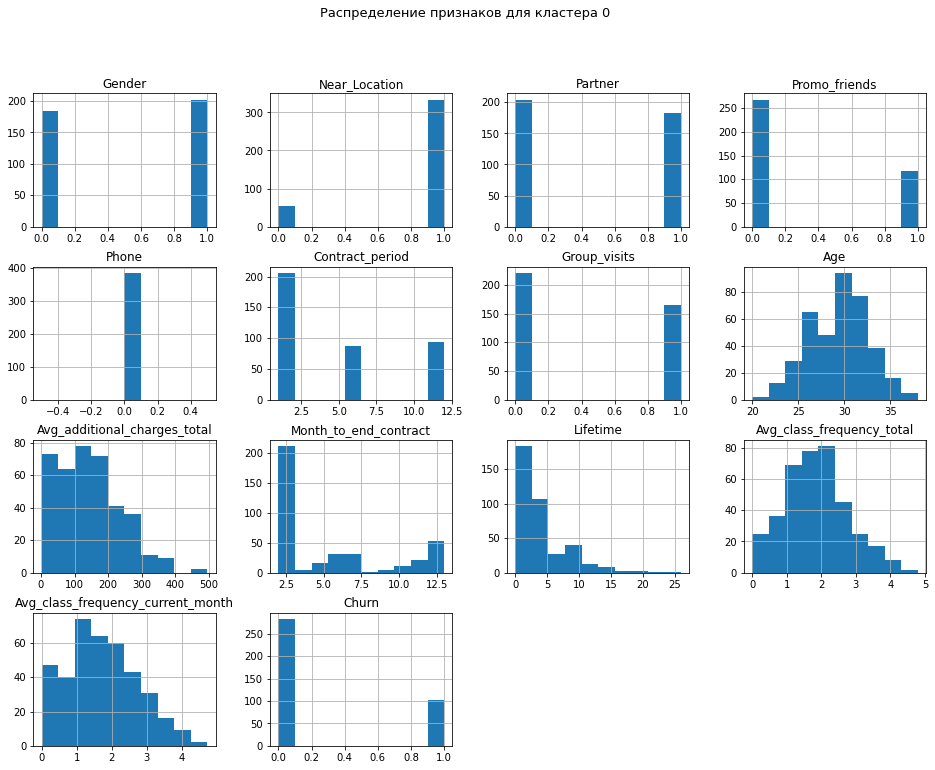

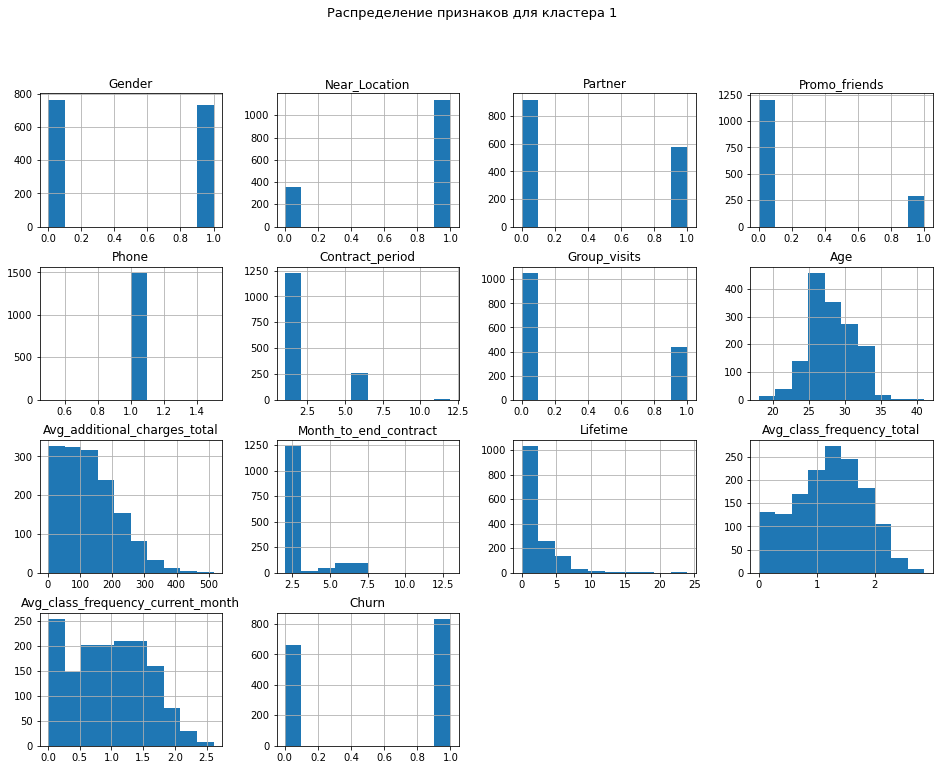

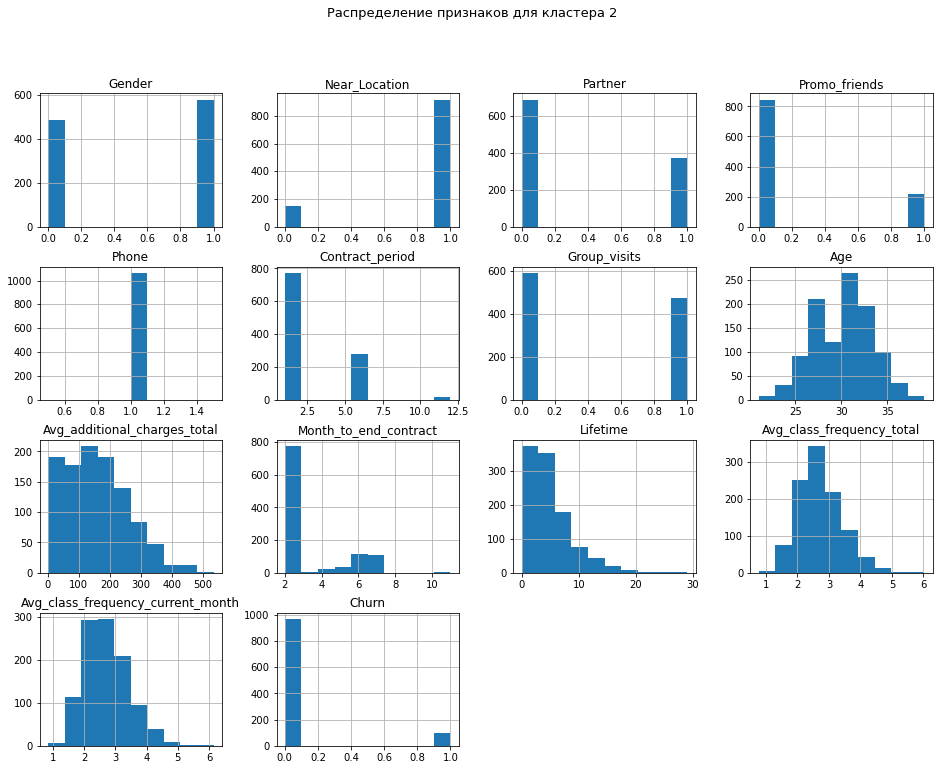

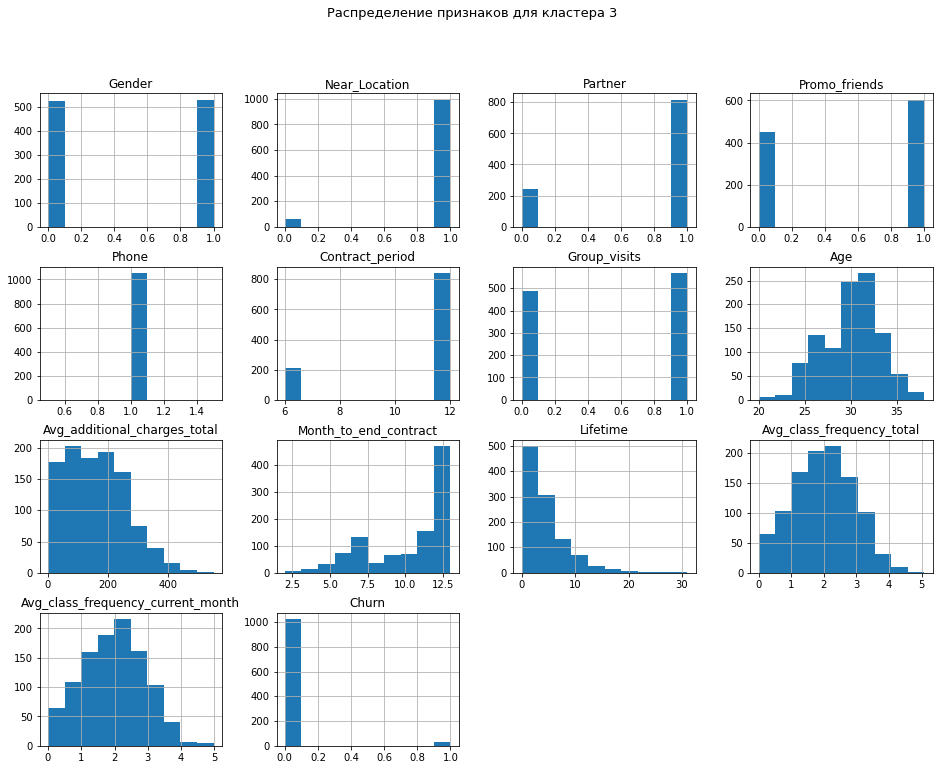

In [339]:
clusters = [0, 1, 2, 3]
for cluster in clusters:
    data[data_clust['Cluster'] == cluster].hist(figsize=(16,12))
    plt.suptitle('Распределение признаков для кластера {}'.format(cluster), fontsize = 13)
    plt.show()
    

/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

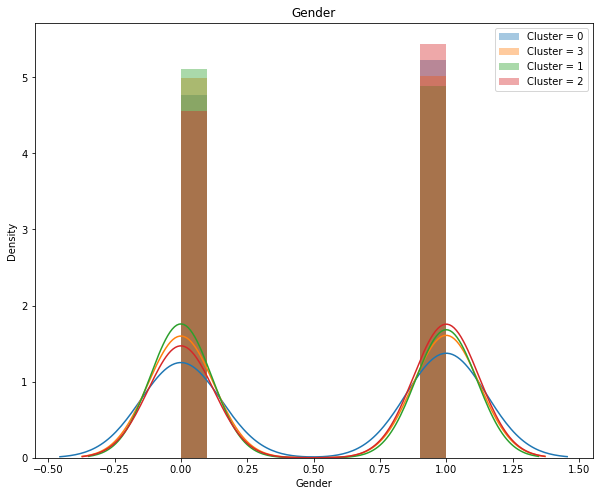

/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

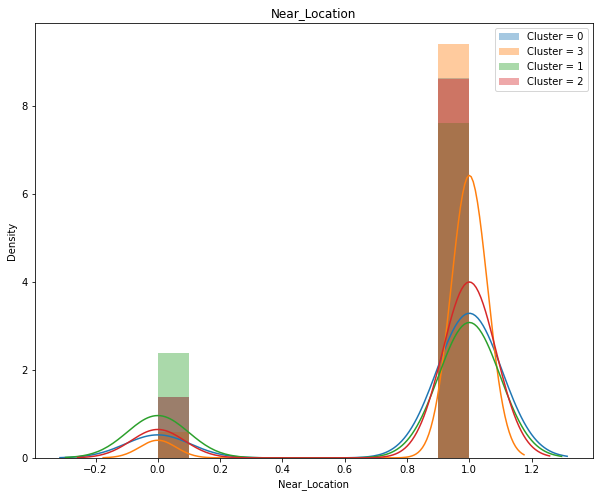

/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

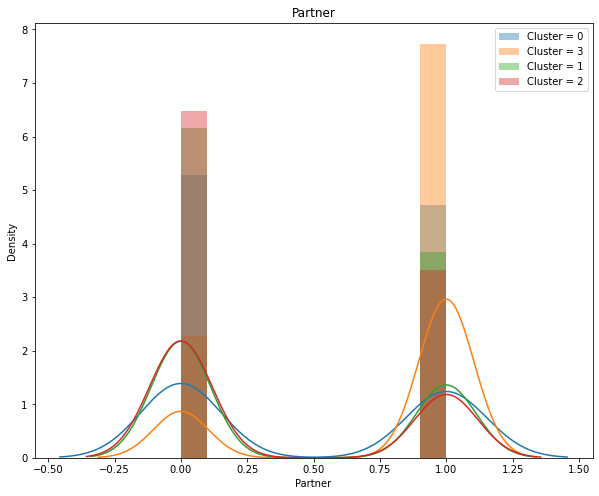

/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

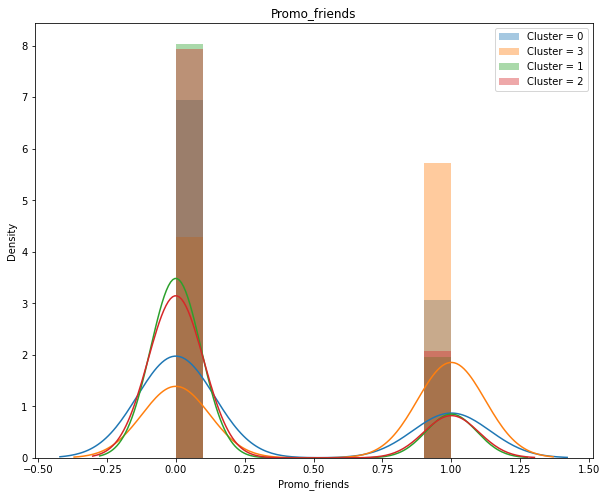

/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py

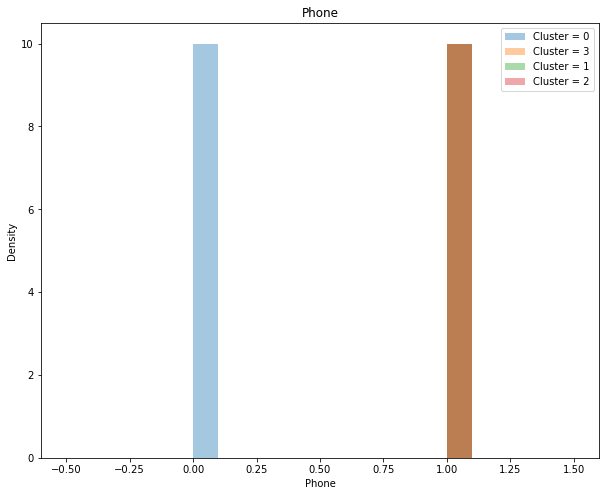

/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

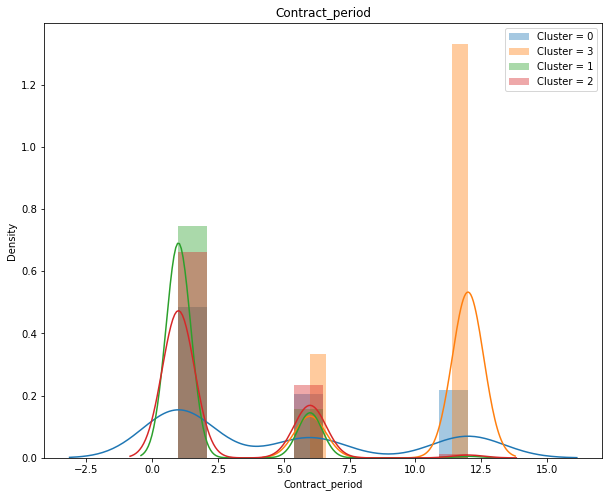

/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

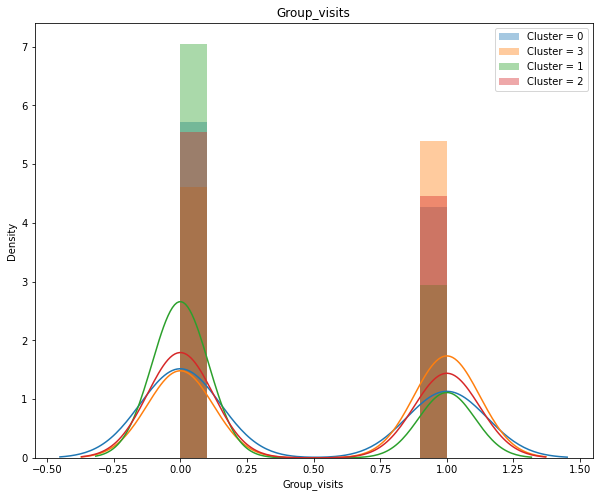

/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

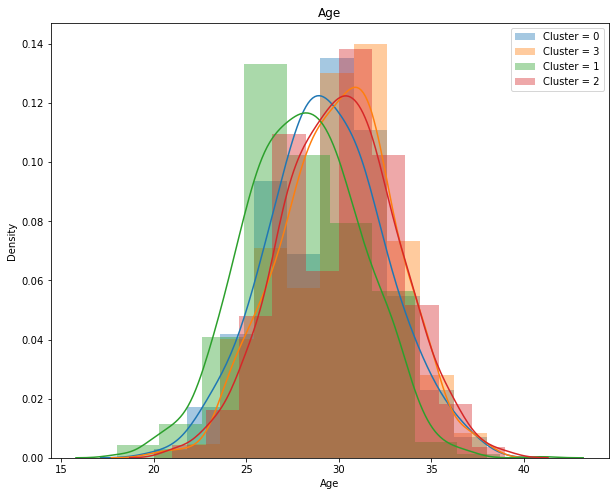

/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

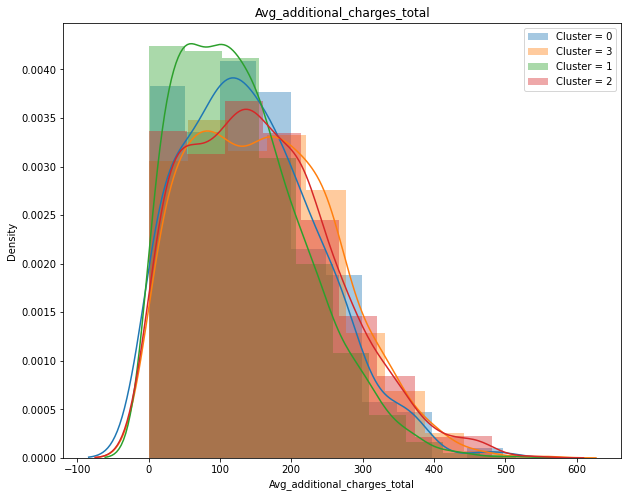

/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

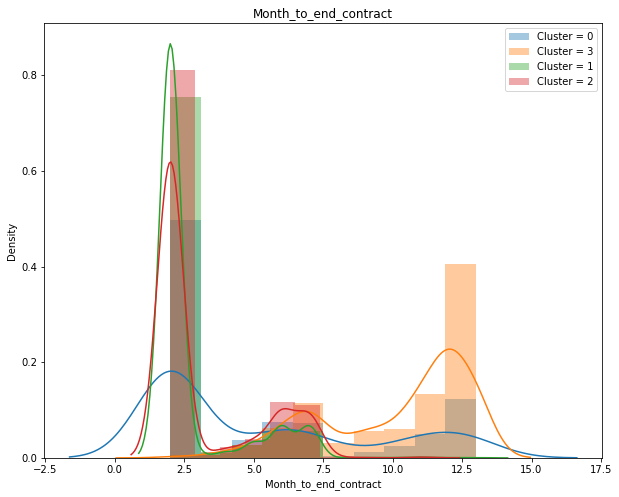

/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

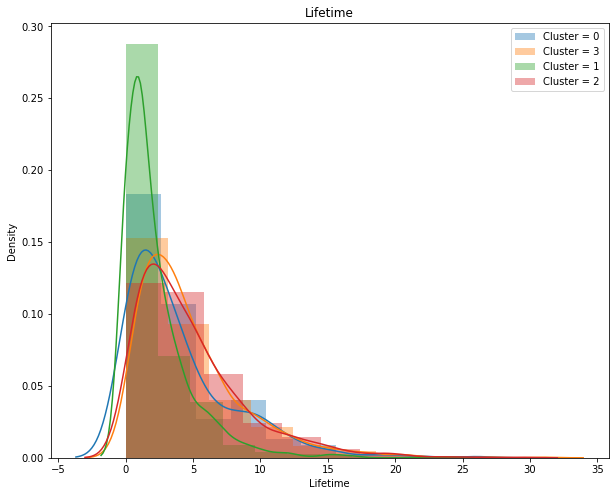

/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

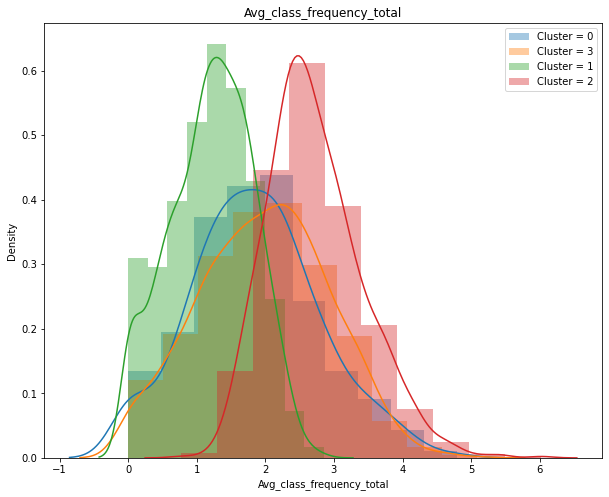

/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

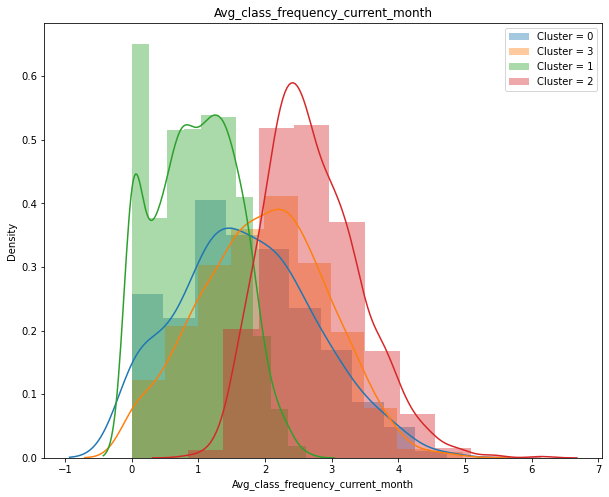

/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

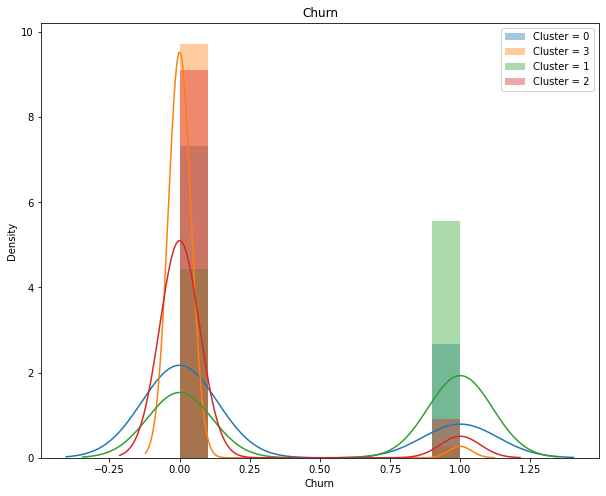

/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

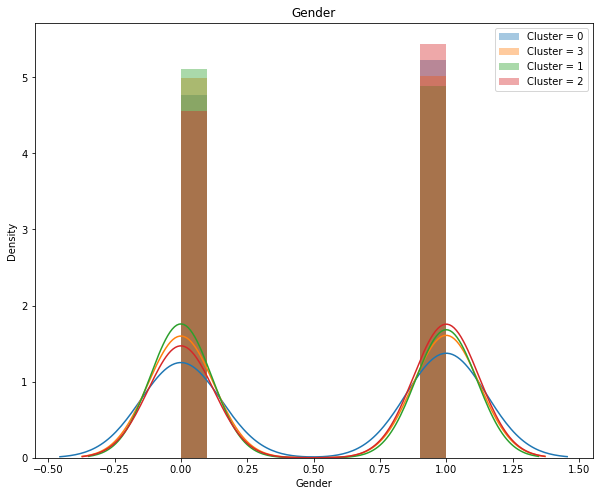

/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

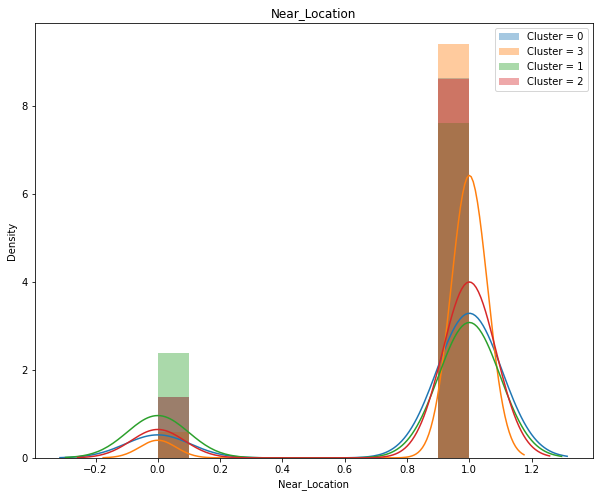

/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

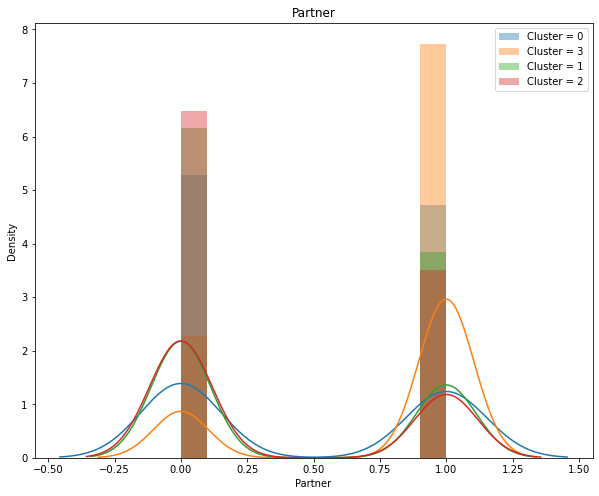

/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

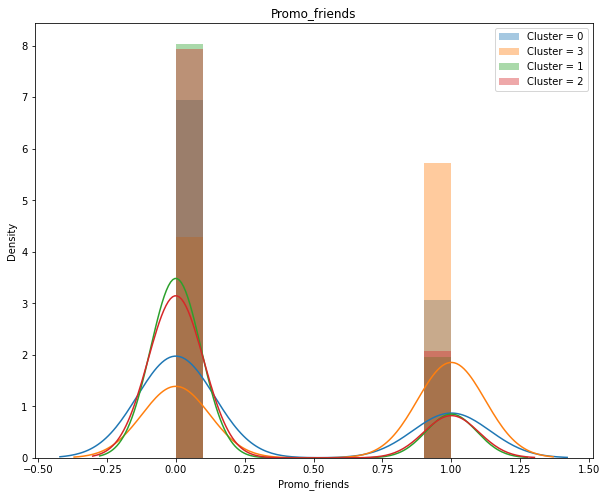

/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py

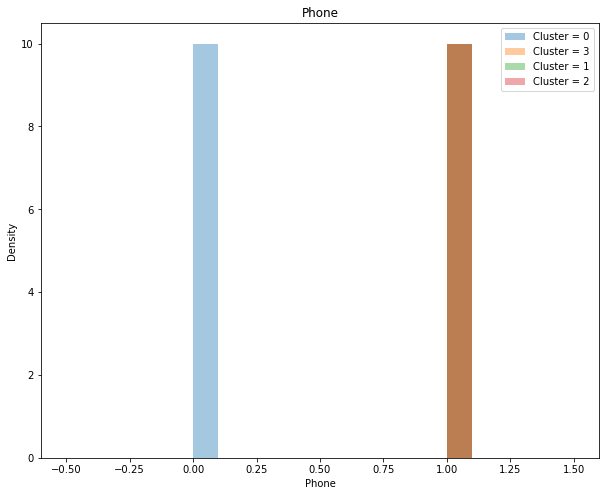

/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

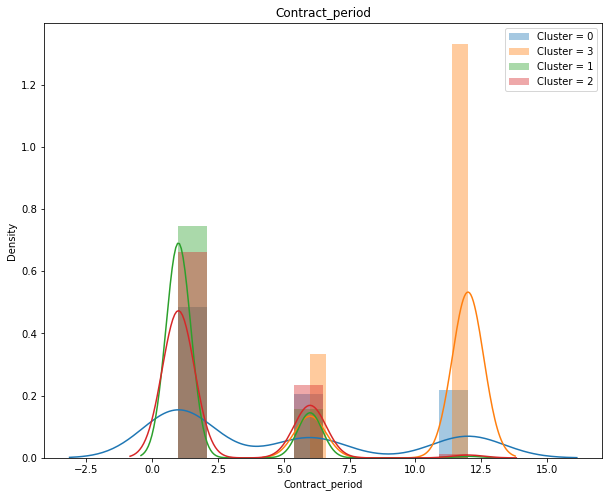

/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

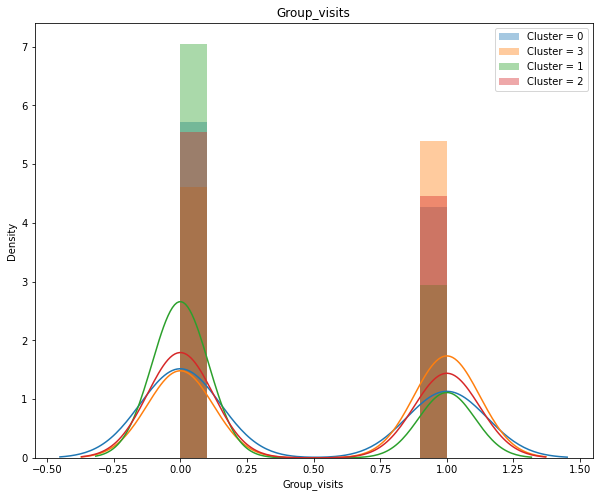

/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

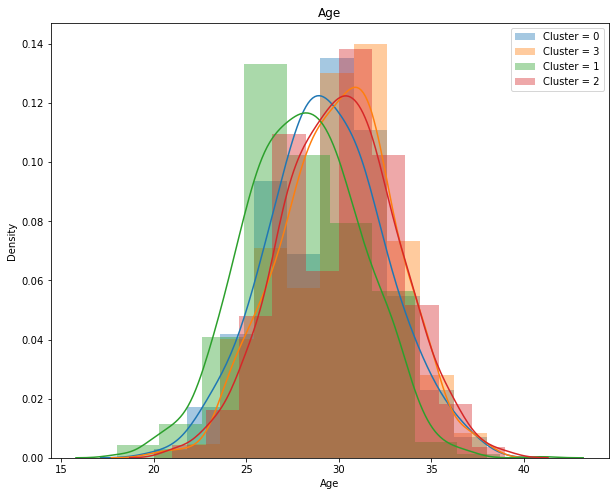

/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

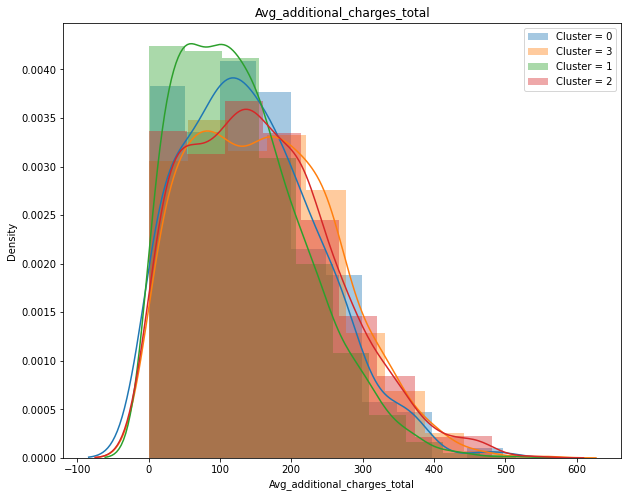

/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

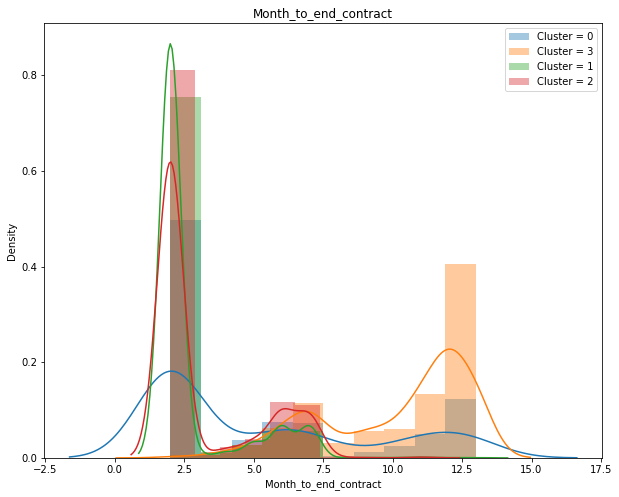

/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

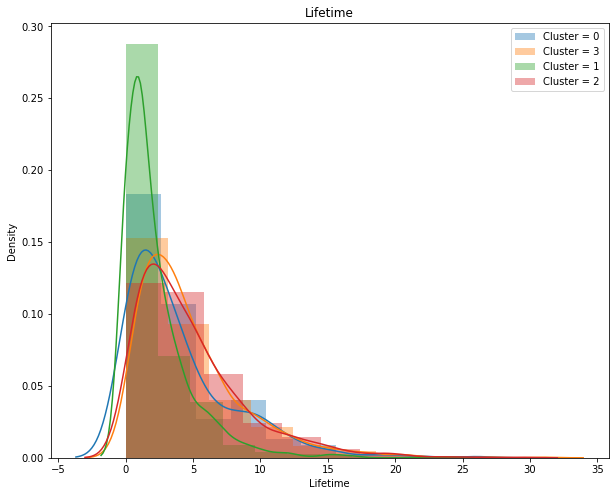

/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

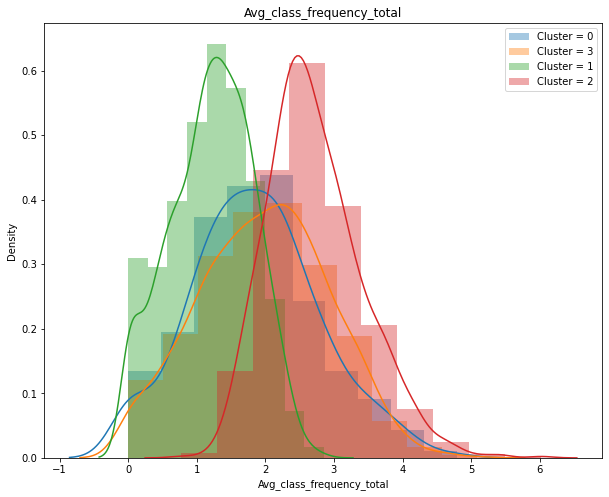

/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

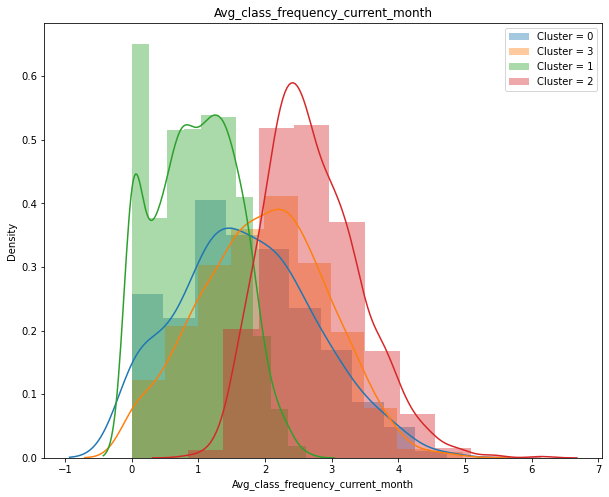

/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

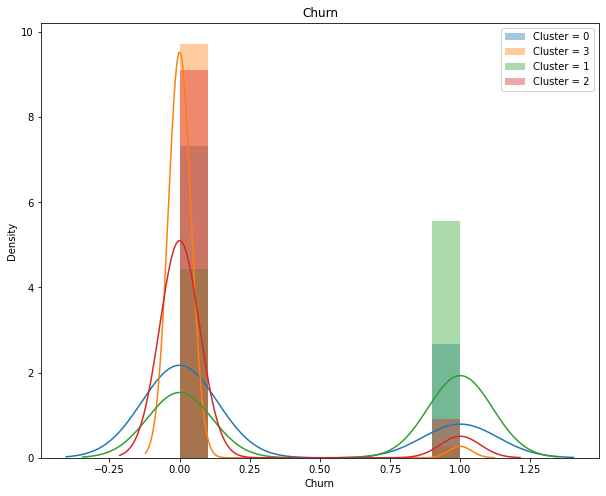

/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

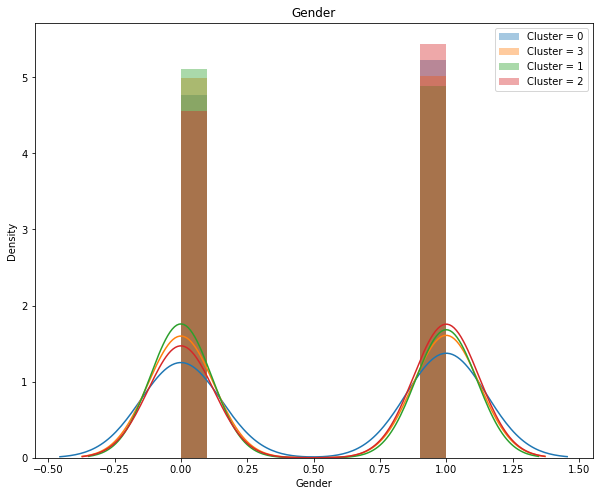

/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

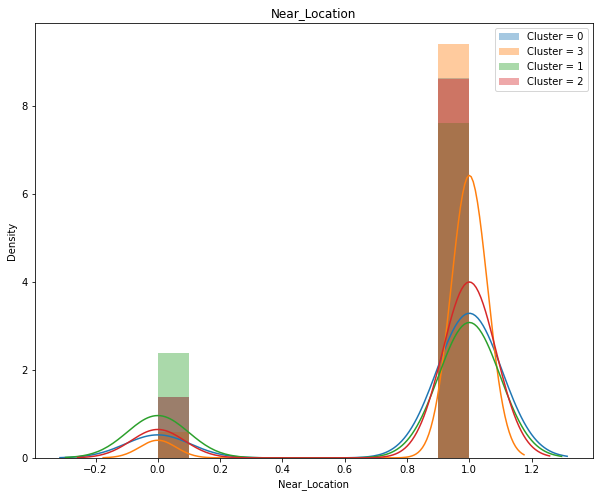

/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

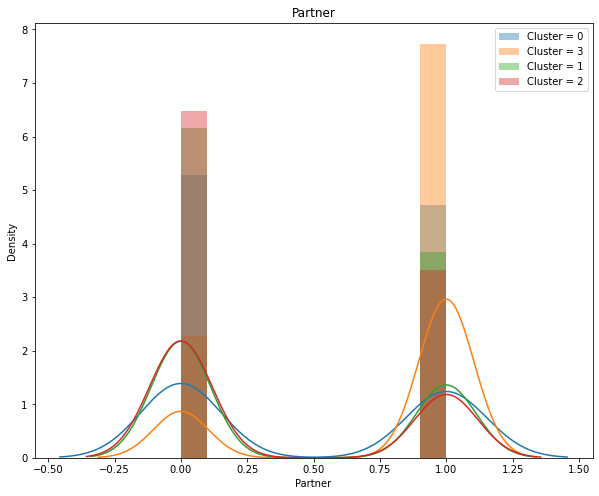

/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

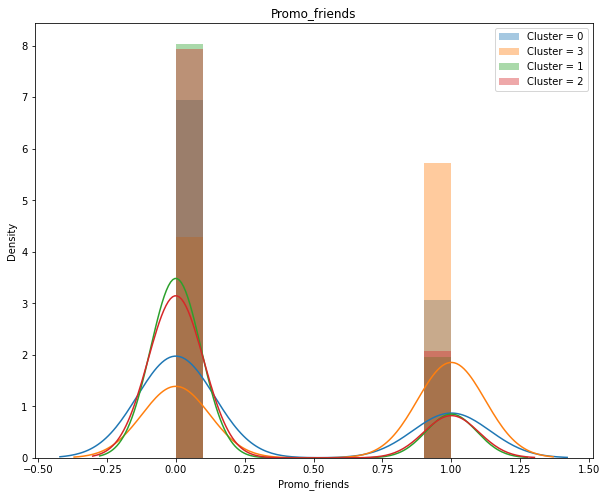

/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py

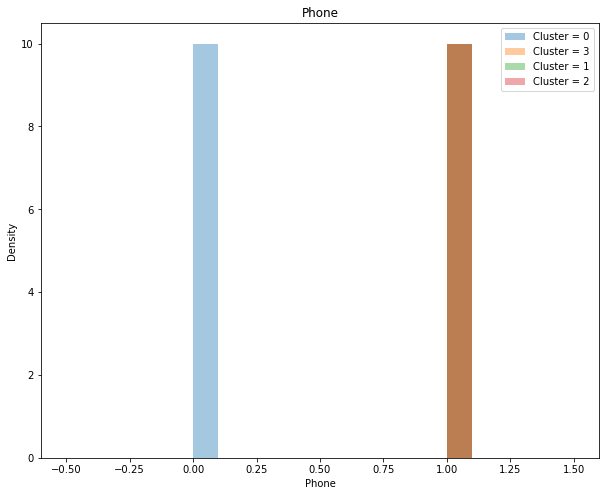

/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

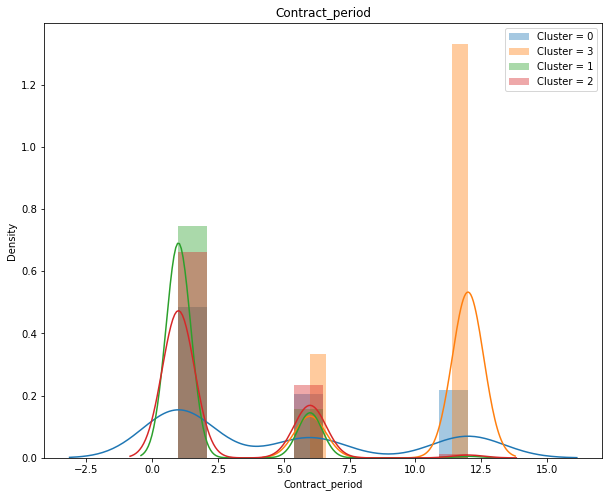

/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

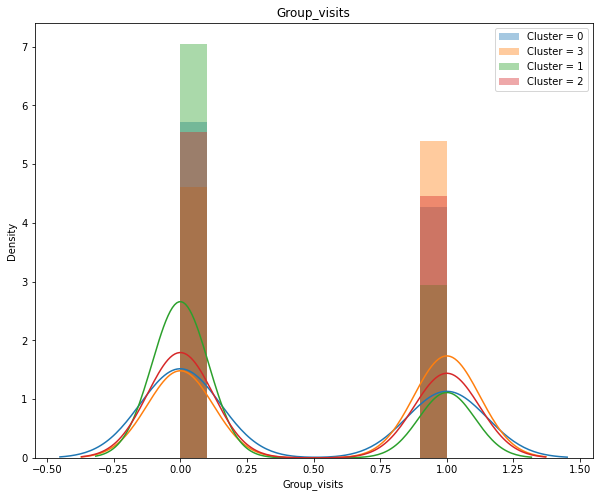

/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

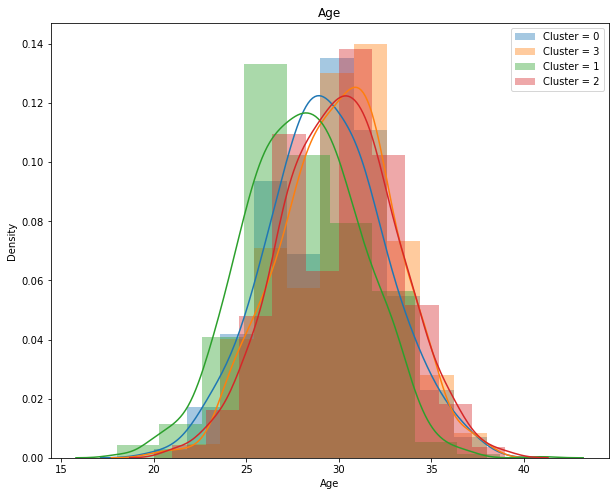

/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

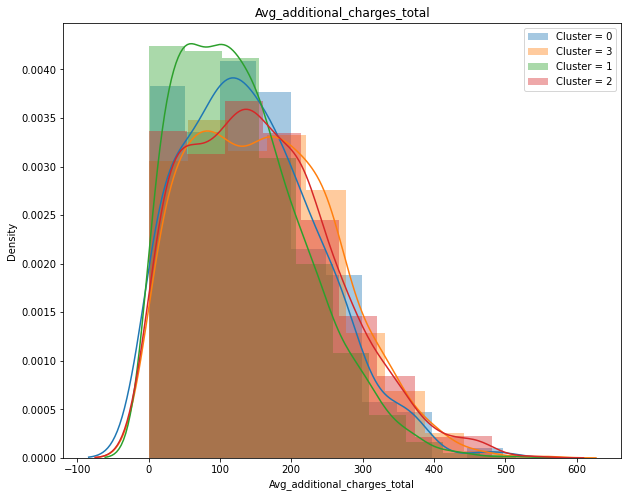

/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

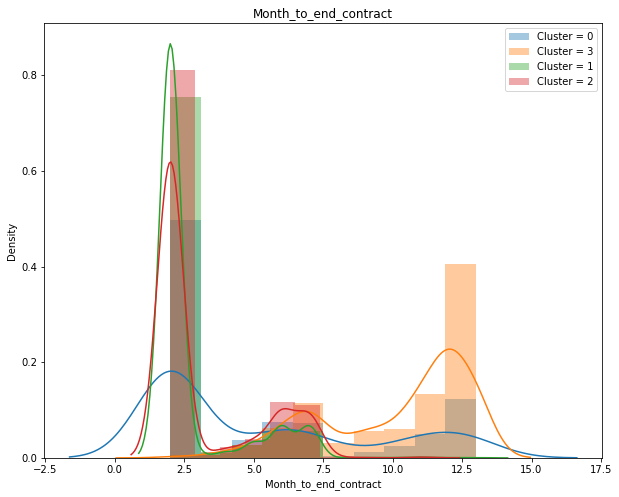

/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

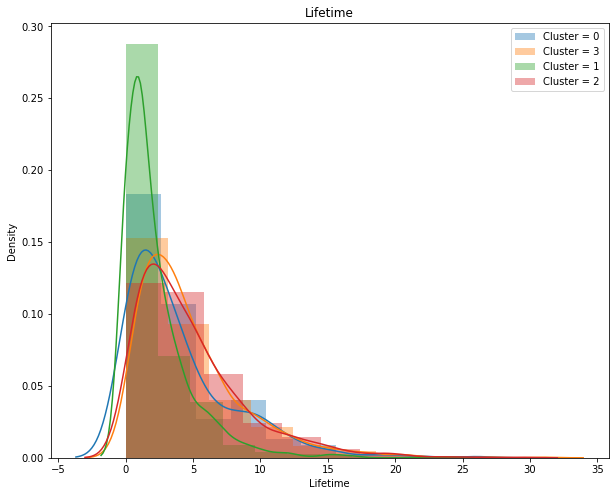

/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

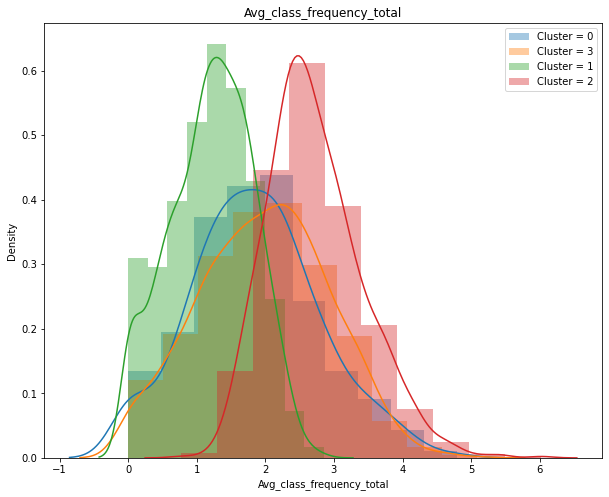

/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

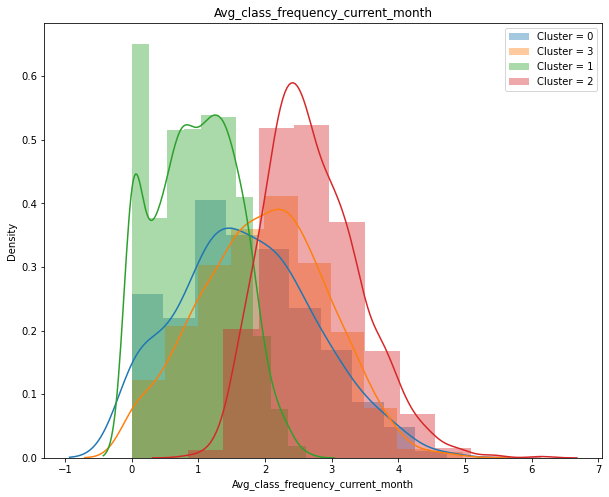

/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

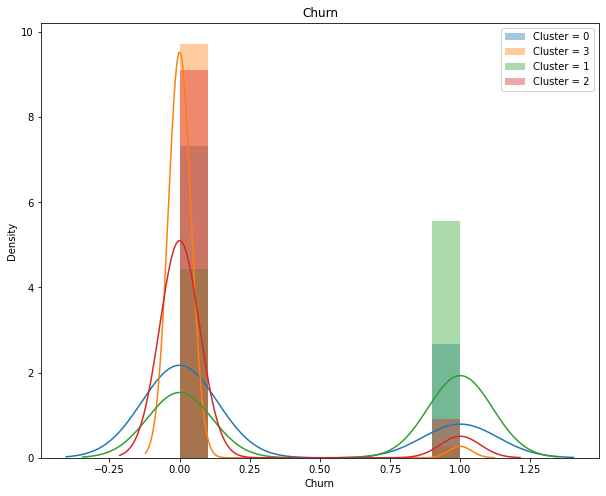

/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

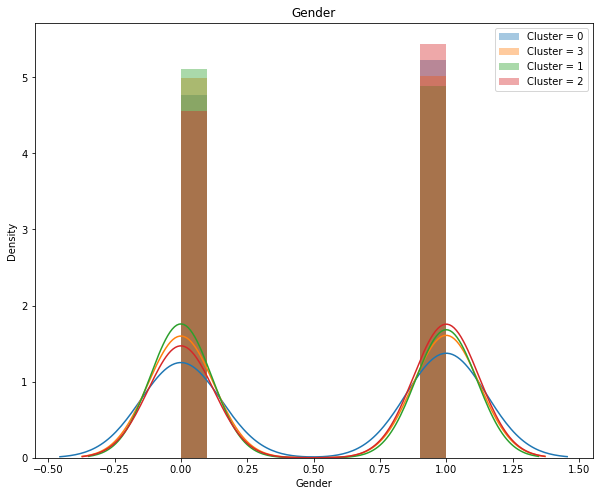

/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

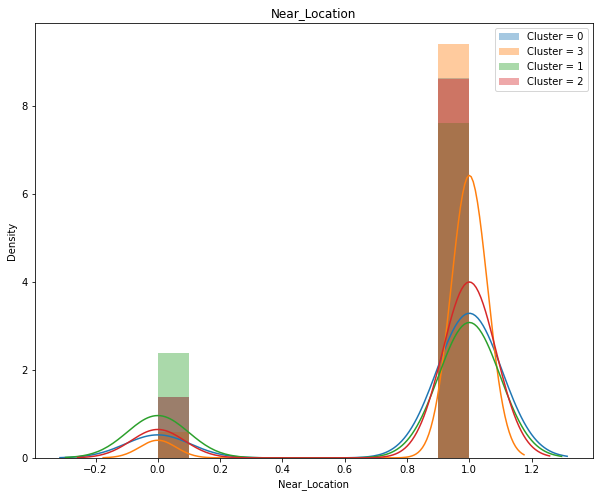

/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

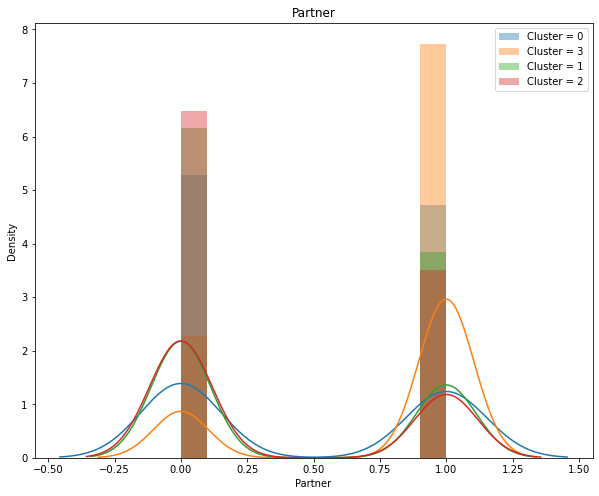

/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

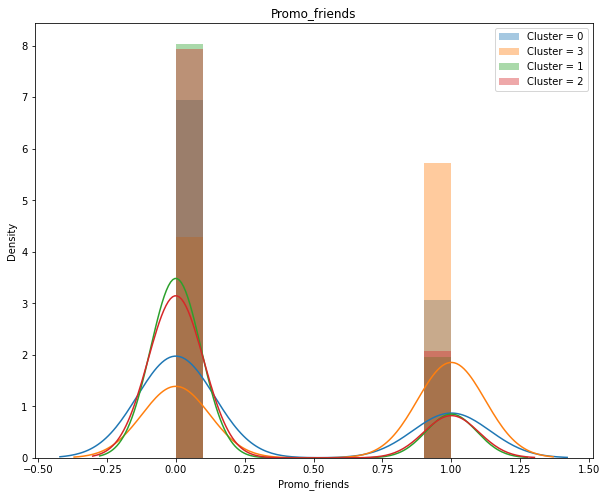

/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py

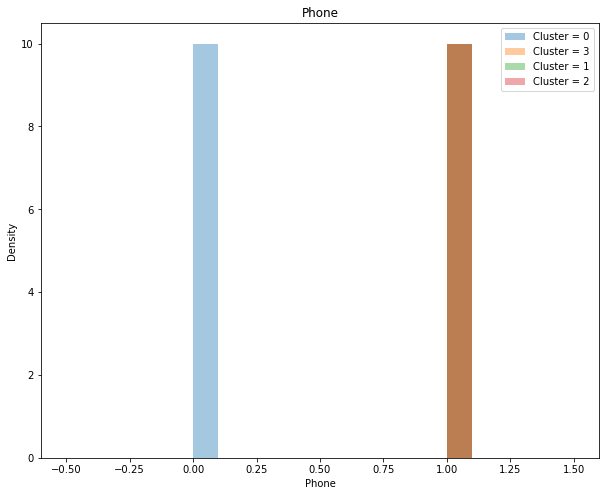

/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

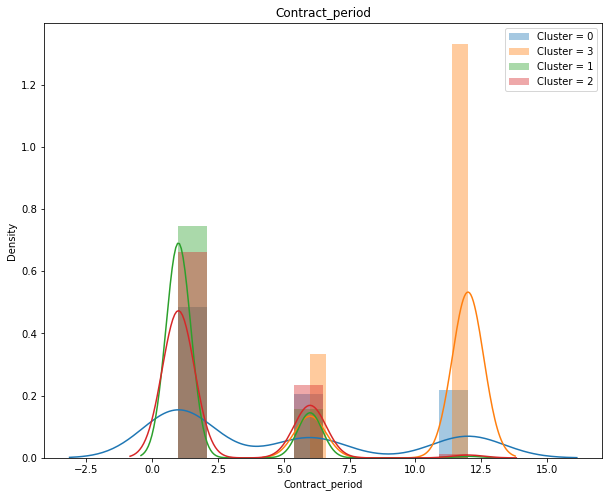

/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

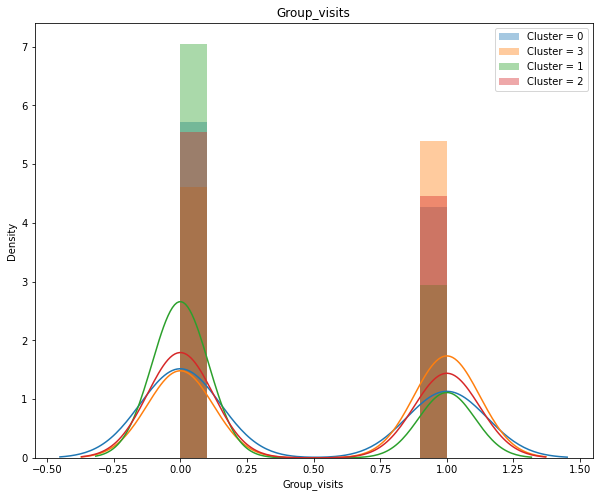

/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

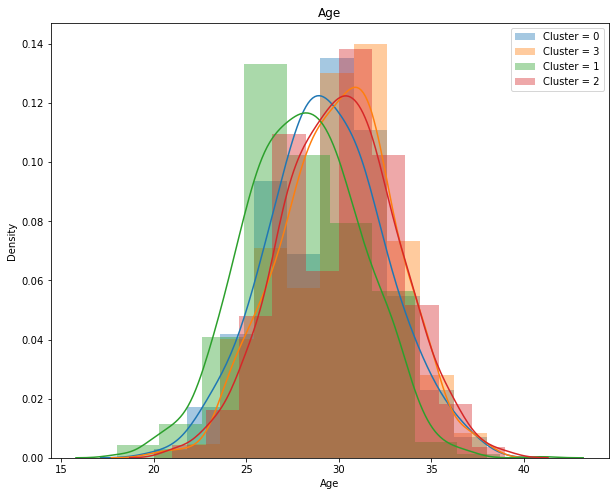

/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

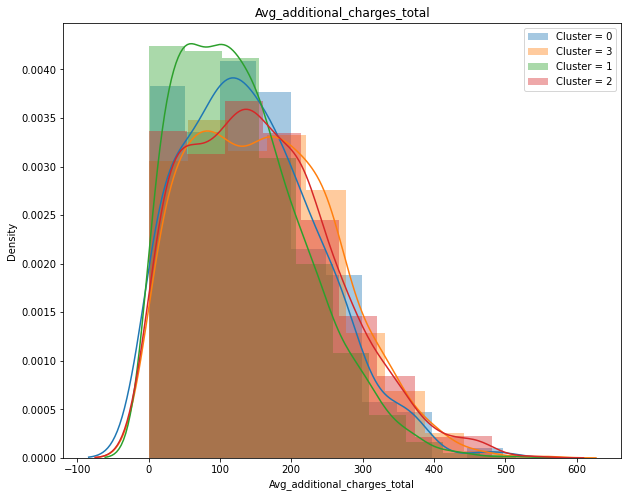

/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

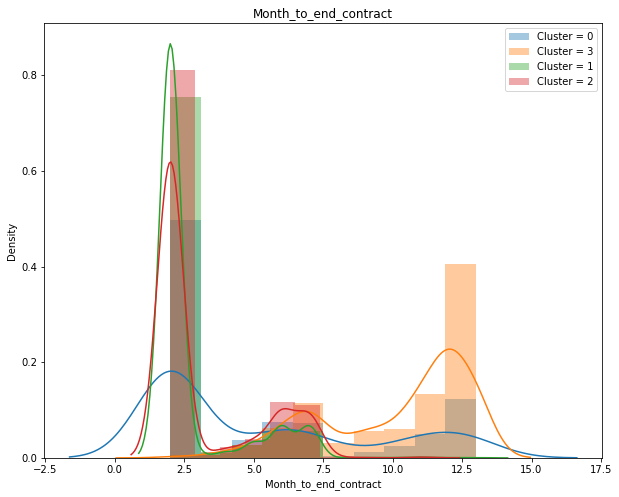

/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

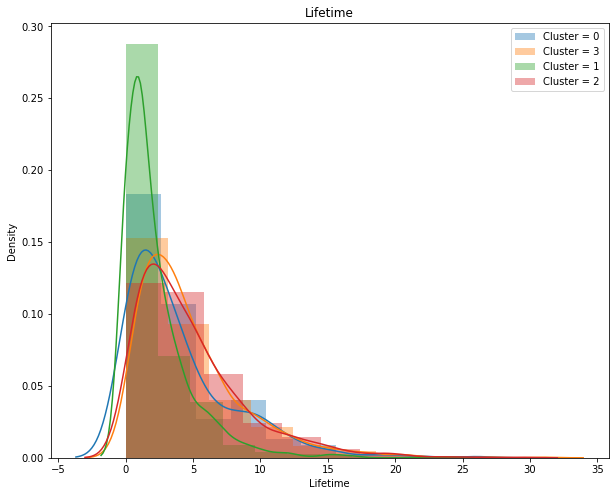

/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

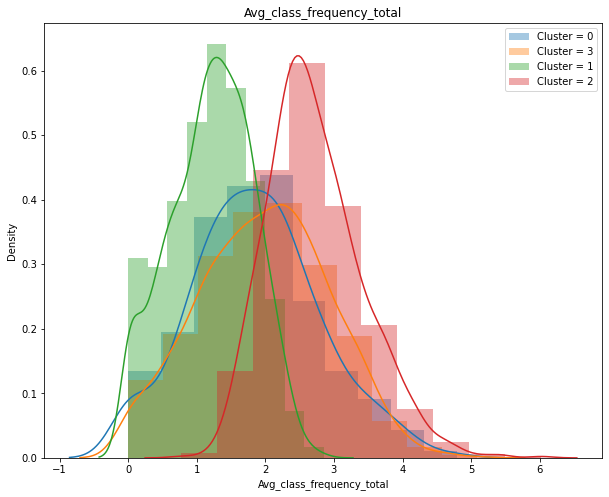

/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

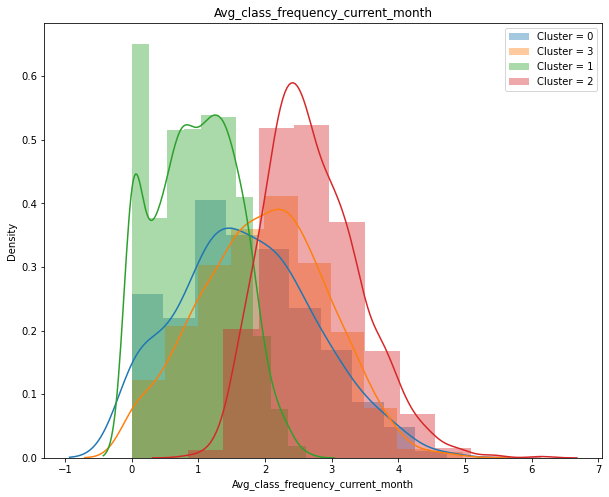

/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

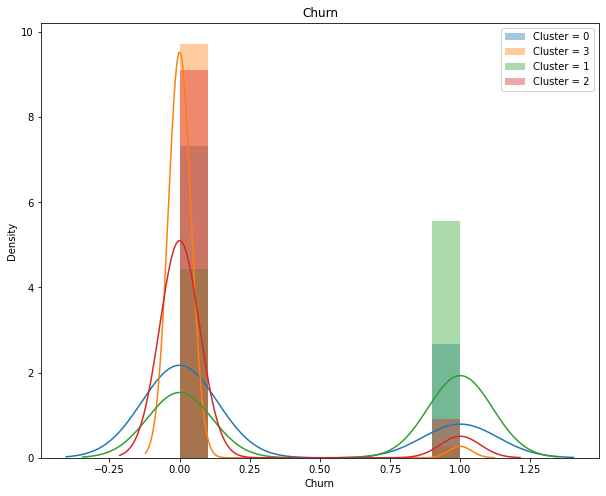

In [386]:
# Строю распределение признаков между кластерами

for cluster in clusters:
        feat_hist(data_clust, 'Cluster', data.columns)

Рекомендации по удержанию клиентов в проблемных кластерах: 

Кластер 0 - необходимо знать номера телефонов клиентов. Предложить дополнительные скидки на групповые занятия или дополнительные услуги при втором посещении в неделю (тк в этом кластере средний срок посещения в неделю 1,72). 

Кластер 1 - можно попробовать использовать скидки, как и для кластера 0 + для тех клиентов, которые живут далеко от фитнеса, предлагать дополнительные варианты совмещения посещения нескольких занятий (например, зал + сауна, зал + бассейн).  Не продавать абонементы с коротким сроком действия - минимум 6 месяцев. Так как в этом кластере самый низкий процент прихода клиентов по акции "приведи друга" предложить скидки для самих клиентов и  друзей, в случае, если клиент привел друга. 

Кластер 2 - нет проблем с посещением, но короткие абонементы. Возможно стоит попробовать сделать скидку на продление абонемента до года. Также имеет смысл аналогично как с кластером 1 сделать скидку по акции "приведи друга".